# -----------RFM Customer Segmentation & ML Model Application--------------------

# Objective:
- To identify distinct group of customers based on their purchasing behaviour traits such as Recency,Frequency and       Segmentation.
- By leveraging ecommerce sales data and machine learning algorithms, we aim to gain insights into the preferences, behaviors, and needs of different customer segments, and create personalized experiences that drive customer loyalty and satisfaction.
- The ultimate goal is to increase the overall profitability and competitiveness of the ecommerce business.

# Steps

 - Part 1 : Data Loading and Preprocessing
- Part 2 : Data Wrangling and Data Cleaning
- Part 3 : Priliminary Data Visualisation
- Part 4 : Priliminary Feature Engineering Table(Recency,Frequency,Moneraty value)
- Part 5 : Data Preparation for Clustering
            -5.1 :Data Transformation to eliminate analyse skewness
            -5.2 :Data Scaling
- Part 6 : Unsupervised ML Application
            -6.1 : K-Means Clustering
            -6.2 : DB Scan Clustering
- Part 7 : Cluster Interpretation
- Part 8 : Cluster Exploration for more insights
            -8.1 RFM Score Calculation and 
            -8.2 RFM Segmentation
            -8.3 Segment Visualisation
            -8.4 Customer Classification using RFM Segment
- Part 9 : Stemming and Bag of Words(Product Visualisation on Clusters)
- Part 10 :Feature Selection(Chi Square and correlation factor) & Feature Engineering(Features from Part 8 were used)
- Part 11 :Baseline Models
            
- Part 12 :Hyperparameter Tuning
            -12.1 Logistic Regression
            -12.2 SVM Classifier
- Part 13 :Model Selection: Ensemble Method: Voting Classifier 
- Part 14 :Model Validation
- Part 15 :Feature Importance and Metric Analysis
- Part 16 : Analysis,Insights & Conclusions

###### Loading Libraries

In [1]:
import calendar
import datetime as dt
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns 
import xgboost as xgb

from collections import Counter
from IPython.display import display, HTML
from PIL import Image
from pathlib import Path
from scipy import stats
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN, KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, StratifiedKFold, train_test_split,
                                     learning_curve)
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, LabelEncoder)
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier
from termcolor import colored
from yellowbrick.cluster import KElbowVisualizer

from category_encoders import CountEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from keras.datasets import cifar10
from keras.layers import (BatchNormalization, Conv2D, Dense, Dropout, Flatten,
                          MaxPooling2D)
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.utils import normalize, to_categorical

import plotly.graph_objs as go   # Import the necessary functions from the library
from plotly.offline import iplot   # Import the iplot function from the offline module


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from wordcloud import STOPWORDS, WordCloud
#pip install -U scikit-learn --user
#!pip install feature-engine
#import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#pip install --upgrade threadpoolctl
#!pip install yellowbrick

# 1. Loading Data and Pre-Processing

In [83]:
#Loading Data from Local Drive
df_default= pd.read_excel("Online Retail.xlsx",dtype={'CustomerID': str,'InvoiceID': str})
df_default.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [94]:
df=df_default.copy(deep = True) #for redundency to keep the original dataframe intact

In [119]:
df['CustomerID'].nunique()

4338

In [95]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [114]:
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)


InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type         object    object      object    int64  datetime64[ns]   
null values (nb)         0         0        1454        0               0   
null values (%)        0.0       0.0    0.268311      0.0             0.0   

                 UnitPrice CustomerID Country  
column type        float64     object  object  
null values (nb)         0     135080       0  
null values (%)        0.0  24.926694     0.0

In [115]:
print("Number of rows in dataset: ",df.shape[0])
print("Number Of columns in dataset: ",df.shape[1])

Number of rows in dataset:  541909
Number Of columns in dataset:  8


Overall,541909 products were purchased

# 2. Data Wrangling & Data Cleaning 

In [28]:
# # To check for duplicates. Since we used composite key,there shouldnt be any duplicates
print("Total Number of Duplicated Entries:",df.duplicated().sum())
print("{}% rows are duplicate".format(round((df.duplicated().sum()/df.shape[0])*100)))

Total Number of Duplicated Entries: 5268
1% rows are duplicate


In [96]:
# Drop the duplicate rows
df.drop_duplicates(inplace=True)

In [118]:
df.describe()

Quantity      UnitPrice
count  536641.000000  536641.000000
mean        9.620029       4.632656
std       219.130156      97.233118
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [97]:
df['StockCode'].value_counts()

85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: StockCode, Length: 4070, dtype: int64

In [34]:
len((df['StockCode'].value_counts()))

4070

In [36]:
len(df['CustomerID'].unique().tolist())

4373

In [98]:
pd.DataFrame([
    {
        'Products':len(df['StockCode'].value_counts()),
        'Transactions':len(df['InvoiceNo'].value_counts()),
        'Customers':len(df['CustomerID'].value_counts())
    }
],index = ['Quantity'])

Products  Transactions  Customers
Quantity      4070         25900       4372

Interesting Insight: on a global average, each customer approx.6 transactions in a calender year

### Missing Values
    - From the original data description, I understood that there are few cancelled orders which are indicated by the letter   'C' in the invoice number 

In [87]:
type(df['InvoiceNo'])

pandas.core.series.Series

In [99]:
cancelled=df['InvoiceNo'].astype(str).str.contains('C')

In [100]:
cancelled.fillna(0,inplace=True)

In [101]:
cancelled=cancelled.astype(int)

In [102]:
cancelled.value_counts()

0    527390
1      9251
Name: InvoiceNo, dtype: int64

In [103]:
df['order_canceled'] = cancelled

In [104]:
a1 = df['order_canceled'].value_counts()[1]
a2 = df.shape[0]
print("Number of cancelled transactions:", a1)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(a1, a2, a1/a2*100))
df = df[df['order_canceled'] == 0]

Number of cancelled transactions: 9251
Number of orders canceled: 9251/536641 (1.72%) 


In [127]:
print("Approximately {}% are cancelled transactions".format(round((cancelled.value_counts()[1]/cancelled.value_counts()[0])*100)))

Approximately 2% are cancelled transactions


In [47]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  order_canceled  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom               0  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom               0  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom               0  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom               0  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom               0

In [48]:
# check for missing values
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        134658
Country                0
order_canceled         0
dtype: int64

In [105]:
df['CustomerID'].isnull().sum()

134658

We there 134658 customers who are not present in the data.So We drop them

In [139]:
print("{}% of transactions have no particular customer attached".format(round((df['CustomerID'].isnull().sum()/df.shape[0])*100,2)))

25.53% of transactions have no particular customer attached


As 25.53% of the transactions have no customer ID attached to them,I decided to drop them.

In [106]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (392732, 9)


In [145]:
df['order_canceled'].value_counts()

0    392732
Name: order_canceled, dtype: int64

### To remove negative values

When we did df.describe, We understood from the metrics that these are negative values in both quantites and data. 
In general,these transactions indicate the cancelled orders. However I want to confirm if there are any other negative values in other transactions apart from cancelled orders.

In [107]:
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())
print("Precentage of transactions with zero or negative quantity" ,round(len(df[df['Quantity']<=0])/len(df)*100, 2),"%")
print("Total number of transaction with negative Price:", df[df['UnitPrice'] <= 0 ]['UnitPrice'].count())
print("Precentage of transactions with zero or negative price" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Total number of transaction with negative quantity: 0
Precentage of transactions with zero or negative quantity 0.0 %
Total number of transaction with negative Price: 40
Precentage of transactions with zero or negative price 0.01 %


In [108]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

In [109]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  392692
Number of columns in dataset is:  9


# 3.Priliminary Data Visualization

In [152]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  order_canceled  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom               0  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom               0  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom               0  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom               0  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom               0

In [110]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity'] #Feature Engineering

In [211]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  order_canceled  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom               0   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom               0   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom               0   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom               0   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom               0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [111]:
# check payment_time range
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

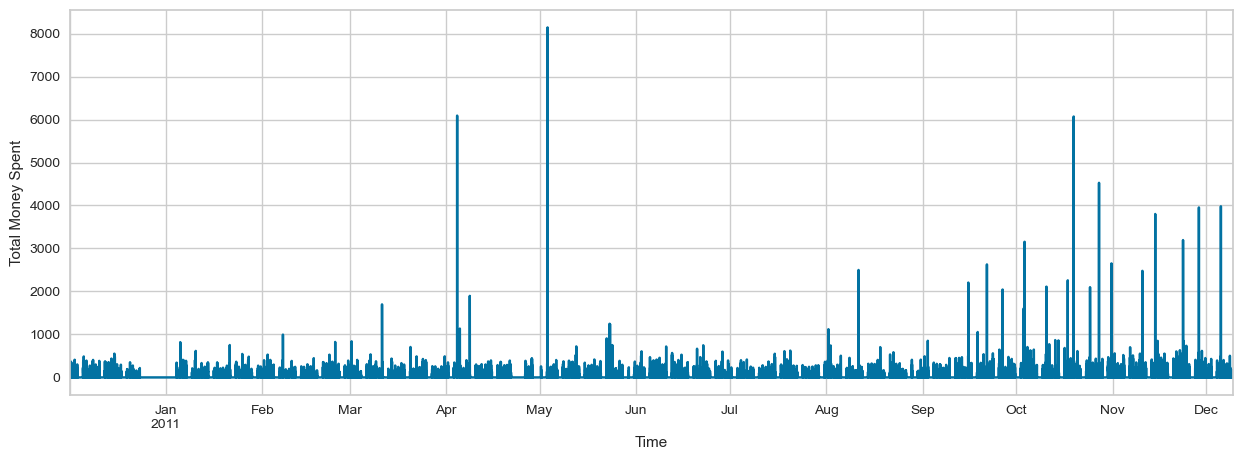

In [112]:
# average money spent every 5 minute interval
df.set_index('InvoiceDate')['UnitPrice'].resample('5min').sum().plot(figsize=(15, 5));
plt.xlabel('Time')
plt.ylabel('Total Money Spent')
plt.show()

Notes:
    Most money is spend in the last quarter of the year. While there are huge splike in the month of April and May,they hint at
    outliers as there no prominet spikes in the near viscinity.

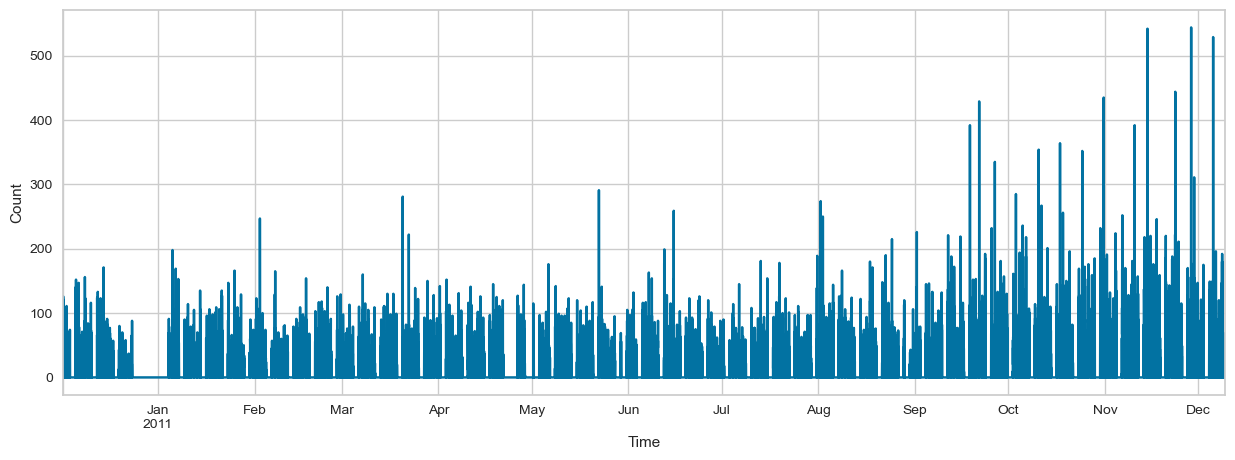

In [113]:
# number of transactions every 5 minute interval
df.set_index('InvoiceDate')['UnitPrice'].resample('5min').count().plot(figsize=(15, 5));
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

This plot validates the previous plots where the number of transactions is higher at the last quarter. 
Also, as we can observe, the density of transactions is less in the months of April and May.

In [114]:
print("Total number of countries in the transactions:", df['Country'].nunique())

Total number of countries in the transactions: 37


In [115]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()

In [118]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

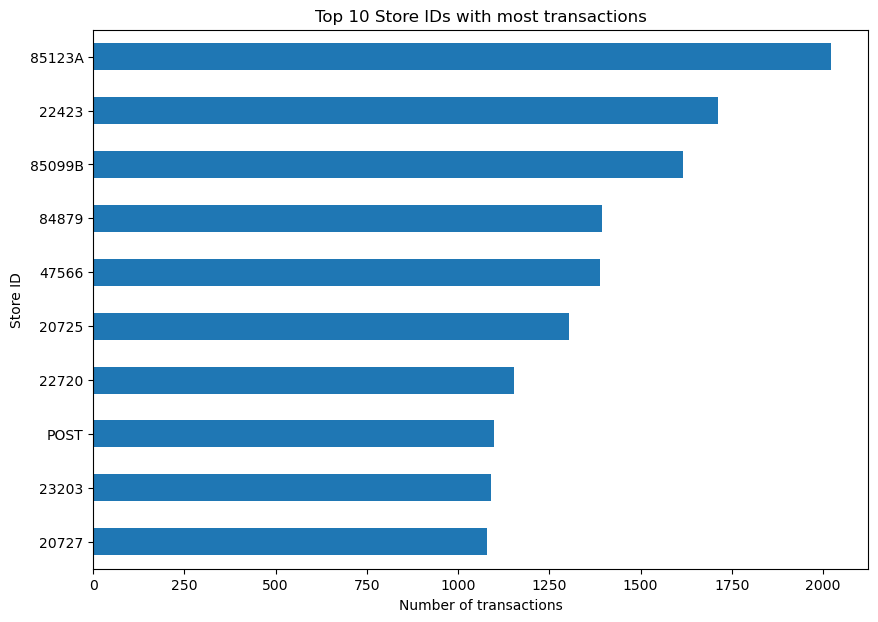

In [188]:
# Top 10 Stock codes with most transactions
df['StockCode'].value_counts()[:10].sort_values().plot(kind='barh', figsize=(10, 7))
plt.title('Top 10 Stockcodes with most purchases')
plt.xlabel('Number of purchases')
plt.ylabel('Store ID')
plt.show()

Each stockcode in the top 10 have atleast 1000 transactions

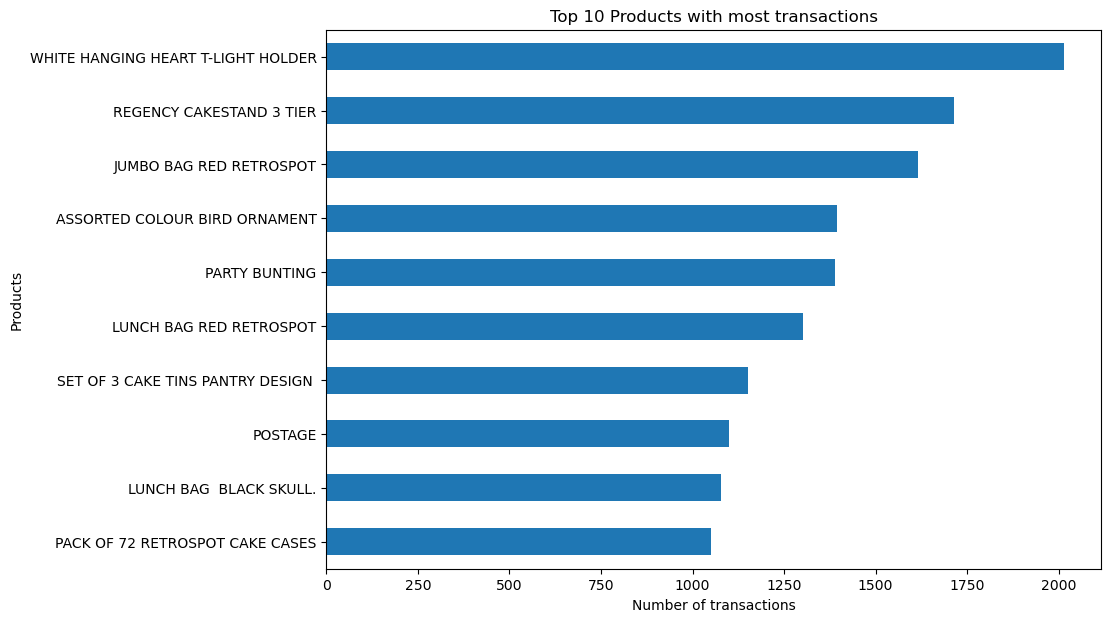

In [191]:
# Top 10 Products with most transactions
df['Description'].value_counts()[:10].sort_values().plot(kind='barh', figsize=(10, 7))
plt.title('Top 10 Products with most transactions')
plt.xlabel('Number of transactions')
plt.ylabel('Products')
plt.show()

Most of the products in the top 10 include home decor items and kitchen utilities

In [ ]:
###Out of 393692 transactions, We can determine total number of unique customers and products involved in the dataframe

In [54]:
pd.DataFrame([
    {
        'Products':len(df['StockCode'].value_counts()),
        'Transactions':len(df['InvoiceNo'].value_counts()),
        'Customers':len(df['CustomerID'].value_counts())
    }
],index = ['Quantity'])

Products  Transactions  Customers
Quantity      3665         18532       4338

We can observe that there are 4338 customers and 3665 products are attached to 18532 unique transactions

In [199]:
df['StockCode'].unique()


array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [204]:
mask = df['StockCode'].notna()
#mask

In [205]:
mask.value_counts()

True    392692
Name: StockCode, dtype: int64

In [207]:
# Apply the mask and select the unique StockCode values that match the regex
list_special_codes = df.loc[mask & df['StockCode'].str.contains('^[a-zA-Z]+', regex=True), 'StockCode'].unique()
list_special_codes

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [209]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [ ]:
We can see that some transactions are not linked to products based on thier stock codes.

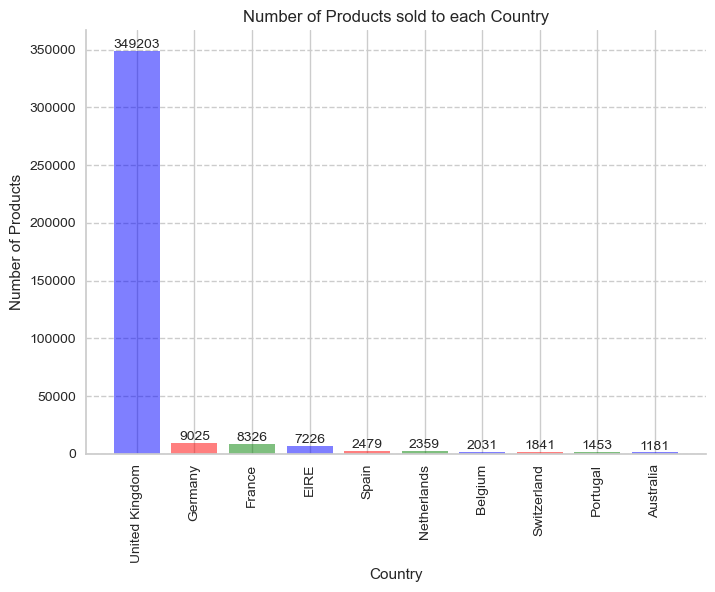

In [121]:
counts = df['Country'].value_counts()[:10]

# Create a bar plot with unique colors and labels
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color=['blue', 'red', 'green'], alpha=0.5)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Products')
ax.set_title('Number of Products sold to each Country')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--')

# Add count labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, counts.values[i],
            ha='center', va='bottom', fontsize=10)
    
ax.set_xticklabels(counts.index, rotation=90)

# Display the plot
plt.show()


# Summary of EDA:
- Most money is spend in the last quarter of the year. While there are huge splike in the month of April and May,they hint at
    outliers as there no prominet spikes in the near viscinity.
- This plot validates the previous plots where the number of transactions is higher at the last quarter.Also, as we can observe, the density of transactions is less in the months of April and May.
- Total number of countries in the transactions: 37
- Each stockcode(product) in the top 10 have atleast 1000 purchases.
- Most of the products in the top 10 include home decor items and kitchen utilities.
- The customers from United Kingdom bought most number of products.
- We can observe that there are 4338 customers and 3665 products are attached to 18532 unique transactions.



# 4.To Create Recency-Frequency-Monetary (RFM) table 

- RFM (Recency, Frequency, Monetary) is a basic customer segmentation algorithm that leverages three key customer data points to identify their purchasing behavior:
<br> 

- Recency: the number of days since the customer's last purchase
- Frequency: the total number of purchases made by the customer
- Monetary: the total amount spent by the customer on purchases made within a given time frame.
<br> 
- By analyzing these three data points, businesses can divide their customer base into homogeneous groups based on their purchasing behavior. This segmentation helps businesses to develop targeted marketing strategies for each group, thus optimizing their marketing efforts.
<br> 
- The RFM analysis is particularly useful for identifying High-Value Customers (HVCs), who are typically the most profitable customers for the business. These customers have made frequent purchases recently, spent a considerable amount of money, and are likely to make repeat purchases in the future. Identifying and targeting HVCs can help businesses increase their revenue and improve customer loyalty.
<br> 
 - Overall, RFM analysis is a simple yet effective approach to customer segmentation that can provide valuable insights into customer behavior and help businesses develop targeted marketing strategies to improve their bottom line.










In [55]:
data=df.copy(deep = True) #redundency for  data corruption or changes

In [34]:
#data.to_csv('data.csv', index=False)

In [32]:
data=pd.read_csv('data.csv')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  \
0  2010-12-01 08:26:00       2.55       17850  United Kingdom               0   
1  2010-12-01 08:26:00       3.39       17850  United Kingdom               0   
2  2010-12-01 08:26:00       2.75       17850  United Kingdom               0   
3  2010-12-01 08:26:00       3.39       17850  United Kingdom               0   
4  2010-12-01 08:26:00       3.39       17850  United Kingdom               0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [57]:
print('Start date:' , data['InvoiceDate'].min())
print('End date:' , data['InvoiceDate'].max())

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [58]:
# To consider only the date
data['InvoiceDate'] = data['InvoiceDate'].dt.date

In [ ]:
# you changed df too

In [59]:
data['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 392692, dtype: object

In [60]:
snapshot_date = max(data.InvoiceDate) + dt.timedelta(days=1) 

In [48]:
snapshot_date

datetime.date(2011, 12, 10)

In [62]:
#To Create RFM Table:
# Aggregating all the data by each customer
rfm=data.groupby('CustomerID').agg({'InvoiceDate':lambda x:(snapshot_date-x.max()).days,'InvoiceNo':lambda x:len(x),
                                    'TotalPrice':lambda x:x.sum()}).reset_index()
rfm['InvoiceDate']=rfm['InvoiceDate'].astype(int) #for statistic computation and cluster making purpose

#To name columns to our dataframe RFM:
rfm.rename(columns=
           {
            'InvoiceDate':'Recency',
               'InvoiceNo':'Frequency',
               'TotalPrice':'MonetaryValue'
           },
           inplace=True)                                                
                   
              

In [63]:
rfm.head() #RFM Table

CustomerID  Recency  Frequency  MonetaryValue
0      12346      326          1       77183.60
1      12347        3        182        4310.00
2      12348       76         31        1797.24
3      12349       19         73        1757.55
4      12350      311         17         334.40

To generate clusters from this data, it needs further processing

# 5.Data Preparation for Clustering

### 5.1 :Data Transformation to eliminate analyse skewness

###### To check for skewness and scaling
    We have to make sure that the data meet these assumptions:

The data should meet assumptions where the variables are not skewed and have the same mean and variance.
Because of that, we have to manage the skewness of the variables. Here are the visualizations of each variable.

# Exploring the data

### Recency,Frequency,Monetary Value Distributions

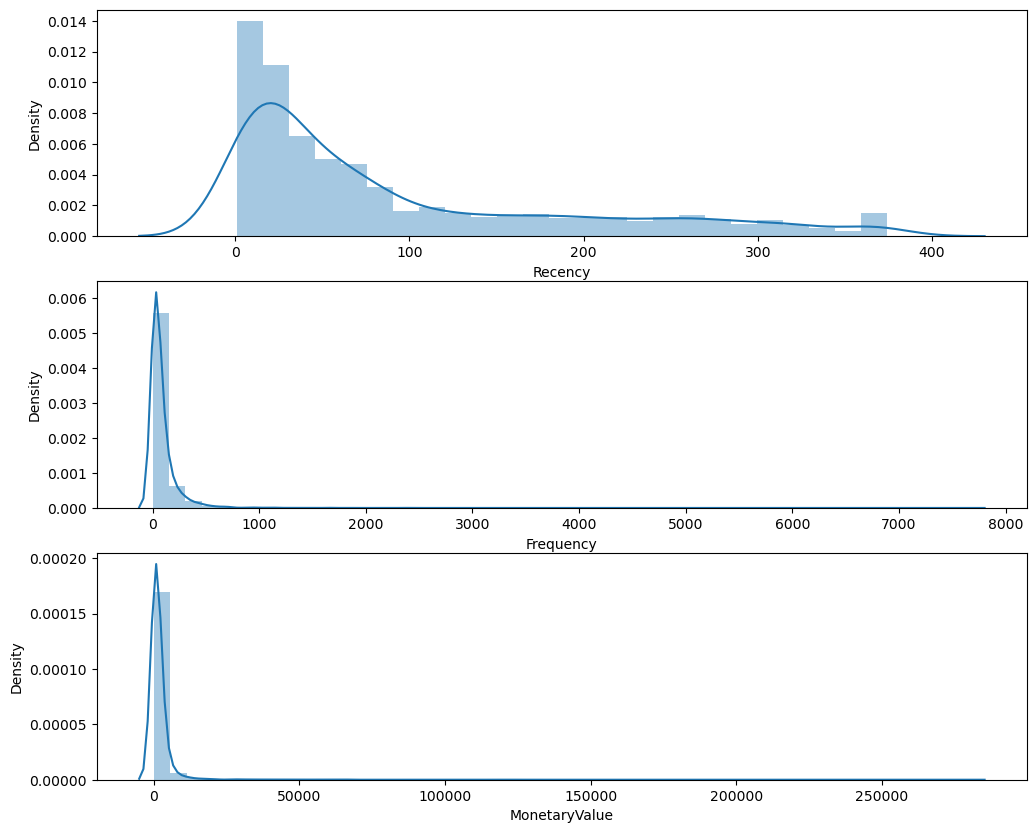

In [64]:
plt.figure(figsize=(12,10))
#Ploting recency distribution
plt.subplot(3,1,1);sns.distplot(rfm['Recency'])

#Ploting frequency distribution
plt.subplot(3,1,2);sns.distplot(rfm['Frequency'])

#Plotting monetary value distribution
plt.subplot(3,1,3);sns.distplot(rfm['MonetaryValue'])

#To show the plot
plt.show()


 As we can see from above, we have to transform the data, so it has a more symmetrical form. There are some methods that we can use to manage the skewness:

    -log transformation
    -square root transformation
    -box-cox transformation
Note: We can use the transformation if and only if the variable only has positive values.


In [263]:
# Reference Article: https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

In [65]:
def To_analyse_skewness(x):
    fig,ax=plt.subplots(2,2,figsize=(5,5))
    sns.distplot(rfm[x],ax=ax[0,0])
    sns.distplot(np.log(rfm[x]),ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]),ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0],ax=ax[1,1]) #it loads from stats and it returns a tuple.so it requires to specify index
    plt.tight_layout()
    plt.show()
    
    print('Log Transform : The skew coefficient moves from ',rfm[x].skew().round(2),' to ',np.log(rfm[x]).skew().round(2))
    print('Square Root Transform : The skew coefficient moves from ',rfm[x].skew().round(2),' to ',np.sqrt(rfm[x]).skew().round(2))
    print('Box-Cox Transform : The skew coefficient moves from ',rfm[x].skew().round(2),' to ',pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))
    
    
    

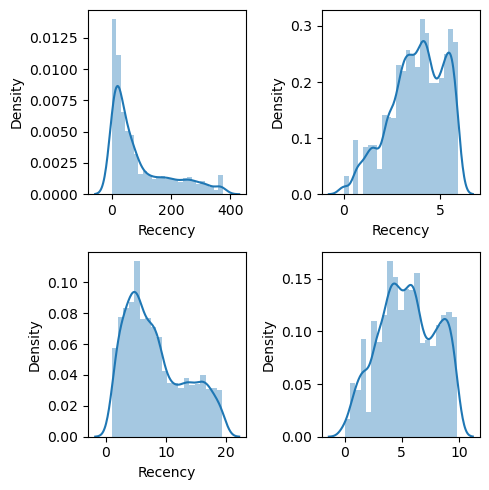

Log Transform : The skew coefficient moves from  1.25  to  -0.47
Square Root Transform : The skew coefficient moves from  1.25  to  0.6
Box-Cox Transform : The skew coefficient moves from  1.25  to  -0.06


In [66]:
To_analyse_skewness('Recency')

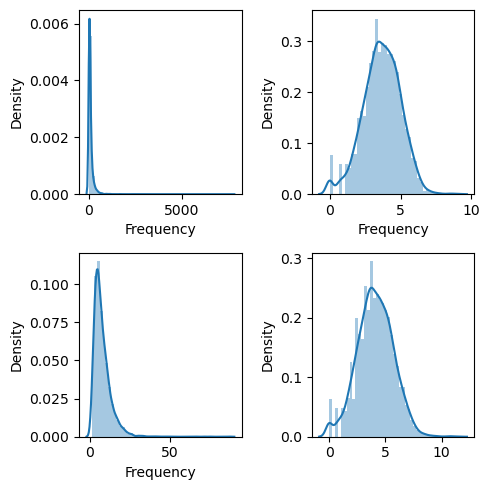

Log Transform : The skew coefficient moves from  18.04  to  -0.22
Square Root Transform : The skew coefficient moves from  18.04  to  3.23
Box-Cox Transform : The skew coefficient moves from  18.04  to  0.0


In [67]:
To_analyse_skewness('Frequency')

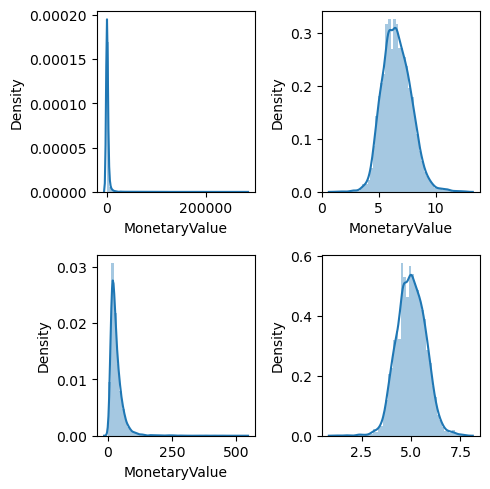

Log Transform : The skew coefficient moves from  19.34  to  0.38
Square Root Transform : The skew coefficient moves from  19.34  to  5.89
Box-Cox Transform : The skew coefficient moves from  19.34  to  -0.02


In [68]:
To_analyse_skewness('MonetaryValue')

Based on that visualization, it shows that the variables with box-cox transformation shows a more symmetrical form rather than the other transformations. To make sure, we calculate each variable using the skew function. The result:

 Recency:
 - Log Transform : The skew coefficient moves from  1.25  to  -0.47
 - Square Root Transform : The skew coefficient moves from  1.25  to  0.6
 - Box-Cox Transform : The skew coefficient moves from  1.25  to  -0.06
 
 Frequency:
 - Log Transform : The skew coefficient moves from  18.04  to  -0.22
 - Square Root Transform : The skew coefficient moves from  18.04  to  3.23
 - Box-Cox Transform : The skew coefficient moves from  18.04  to  0.0
 
 Monetary Value:
 - Log Transform : The skew coefficient moves from  19.34  to  0.38
 - Square Root Transform : The skew coefficient moves from  19.34  to  5.89
 - Box-Cox Transform : The skew coefficient moves from  19.34  to -0.02

It is evident from the calculations that Box-Cox is able to reduce the skewness than anyother transformations.
Henceforth,I will consider Box-Cox Transformation.

In [69]:
#Applying Boxcox
rfm_upgrade=pd.DataFrame()
rfm_upgrade['Recency'] = stats.boxcox(rfm['Recency'])[0]
rfm_upgrade['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_upgrade['MonetaryValue'] = stats.boxcox(rfm['MonetaryValue'])[0]

In [70]:
rfm_upgrade.head()

Recency  Frequency  MonetaryValue
0  9.481099   0.000000       7.252373
1  1.200122   5.964958       5.993348
2  6.225829   3.755086       5.546730
3  3.752632   4.799349       5.534888
4  9.363610   3.049494       4.589198

In [292]:
rfm_upgrade.describe()

Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean      5.486713     4.093943       5.008318
std       2.465538     1.588781       0.714649
min       0.000000     0.000000       1.250392
25%       3.666758     3.049494       4.535740
50%       5.457626     4.090941       5.000273
75%       7.543304     5.169166       5.504698
max       9.828756    11.352652       7.722810

The mean and variance are different for each of the three variables. So, I will use standard scaler to normalize the data.

## 5.2: Data Scaling

In [71]:
#Applying Standard Scaler
scaler=StandardScaler()
scaler.fit(rfm_upgrade)
rfm_normalized=scaler.transform(rfm_upgrade)
print(rfm_normalized.mean(axis = 0).round(2)) 
print(rfm_normalized.std(axis = 0).round(2)) 

[-0. -0. -0.]
[1. 1. 1.]


In [72]:
pd.DataFrame(rfm_normalized)

0         1         2
0     1.620274 -2.577079  3.140439
1    -1.738803  1.177777  1.378499
2     0.299813 -0.213306  0.753480
3    -0.703409  0.444043  0.736908
4     1.572616 -0.657466 -0.586537
...        ...       ...       ...
4333  1.460549 -1.038541 -1.127251
4334  1.049763 -1.288921 -1.876827
4335 -1.226403 -0.908774 -1.140069
4336 -1.596682  2.350492  0.848894
4337 -0.139182  0.411158  0.769800

[4338 rows x 3 columns]

In [312]:
type(rfm_normalized)

numpy.ndarray

In [325]:
np.save('rfm_normalized.npy', rfm_normalized) #redundency

I will consider rfm_normalized dataframe to perform clustering

# 6.Unsupervised ML Application

### 6.1 Model - Clustering with K-means algorithm

To make segmentation from the data, we can use the K-Means algorithm to do this.

K-Means algorithm is an unsupervised learning algorithm that uses the geometrical principle to determine which cluster belongs to the data. By determine each centroid, we calculate the distance to each centroid. Each data belongs to a centroid if it has the smallest distance from the other. It repeats until the next total of the distance doesn’t have significant changes than before.

# Determine the Optimal K
To make our clustering reach its maximum performance, we have to determine which hyperparameter fits to the data. To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide.


In [73]:
arr = np.load('rfm_normalized.npy')

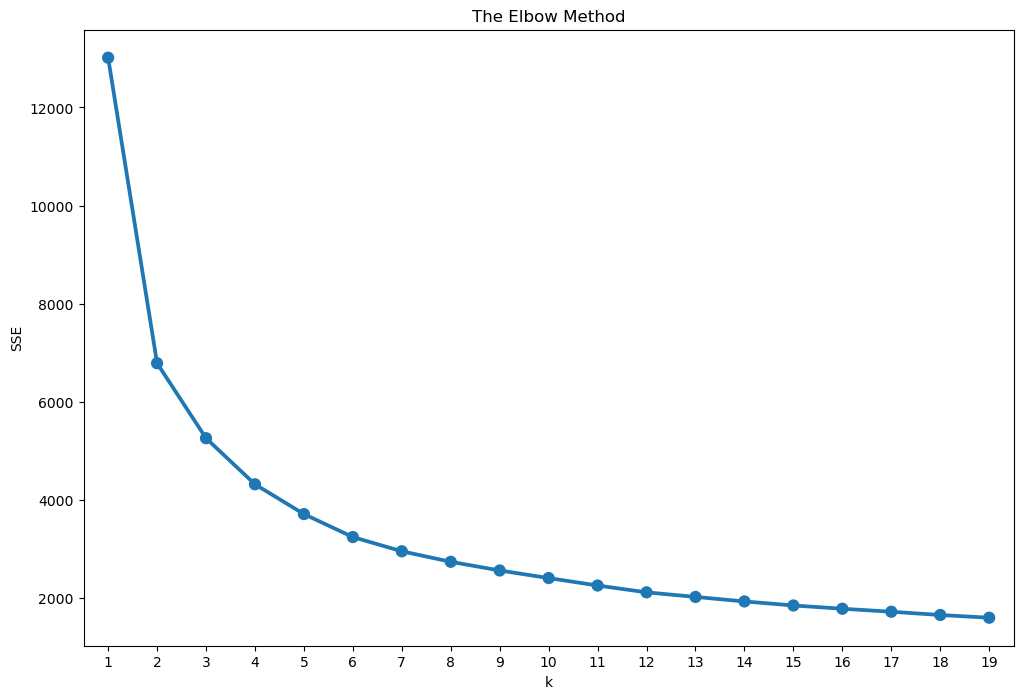

In [74]:
plt.figure(figsize=(12,8))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20) #range of clusters to test
#empty dictionaries and lists to store
distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42) #algo initiatiation
    kmeans.fit(arr)
    
    # Append the distortion value (average distance to cluster centroid) to the distortions list
    distortions.append(sum(np.min(cdist(arr, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / arr.shape[0])
    # Append the inertia value (sum of squared distances to closest cluster centroid) to the inertias list
    inertias.append(kmeans.inertia_)
 
    # Store the distortion value in the mapping1 dictionary for the current value of k
    mapping1[k] = sum(np.min(cdist(arr, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / arr.shape[0]
   
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
    
# Set the title, x-axis label, and y-axis label for the plot
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show() # Display the plot


In [75]:
for key, val in mapping1.items():
    print(f'{key} : {val}') #to check variance decrement at each cluster

1 : 1.5478249707521579
2 : 1.1339130222633937
3 : 0.9895467979479754
4 : 0.8944463993623766
5 : 0.8338217287438885
6 : 0.7758446324396535
7 : 0.7351371125684314
8 : 0.7071014095177767
9 : 0.6809797307054327
10 : 0.6667556226623134
11 : 0.6450406947569066
12 : 0.6270534113132047
13 : 0.6098415912001829
14 : 0.5949507875428087
15 : 0.5828501633437979
16 : 0.5702628668913559
17 : 0.5585931220331211
18 : 0.5513433625697176
19 : 0.5414348950367179


The x-axis is the value of the k, and the y-axis is the SSE value of the data. We will take the best parameter by looking at where the k-value will have a linear trend on the next consecutive k. From the above plot, the k-value of 3 or 4 is the best hyperparameter for our model because the next k-value tend to have a linear trend.

Let us now compare the clustering performance. For this purpose, I calculated the mean values of recency, frequency, and monetary metrics to get the following result:

# Fit the model

   #### For K = 3

In [45]:
model=KMeans(n_clusters=3,random_state=42) #for 3 clusters
model.fit(arr)
model.labels_.shape

(4338,)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

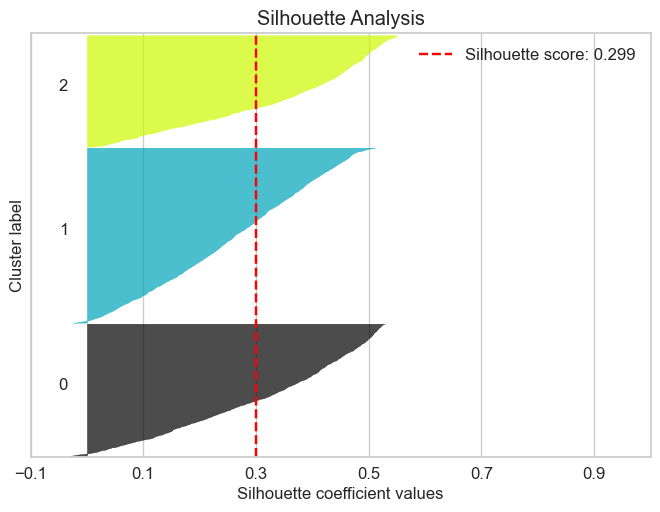

In [54]:
plot_silhouette(arr,model.labels_) # to validate k

In [46]:
rfm.shape

(4338, 4)

By fitting the model,we can have clusters where each data belongs.By that,We can analyze data

In [48]:
rfm['Cluster']=model.labels_
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster
0      12346      326          1       77183.60        1
1      12347        2        182        4310.00        2
2      12348       75         31        1797.24        1
3      12349       19         73        1757.55        2
4      12350      310         17         334.40        0

In [55]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(0) #to check means for all clusters

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        190.74     15.32        286.60  1369
1         64.57     51.60        977.85  1814
2         20.06    240.79       5819.07  1155

At K=3, the silhoutee score is 0.299 and the means of data is not sufficient to conclude. So,We will test for k=4


#### For K = 4

In [76]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(arr)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          93.0      74.0        1456.0  1219
1         222.0      16.0         290.0  1103
2          32.0      26.0         429.0   970
3          14.0     248.0        6096.0  1046

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

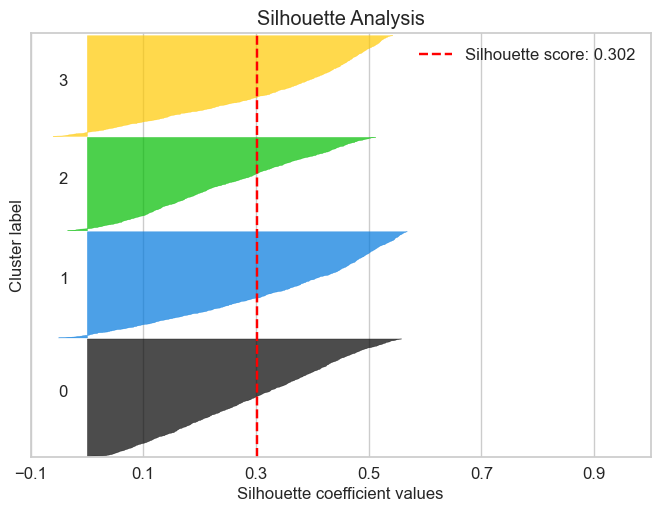

In [104]:
plot_silhouette(arr,model.labels_)

In [96]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(arr)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         194.0      30.0         661.0   991
1          11.0     298.0        7601.0   766
2          59.0      95.0        1737.0  1078
3         187.0       8.0         166.0   612
4          26.0      31.0         489.0   891

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

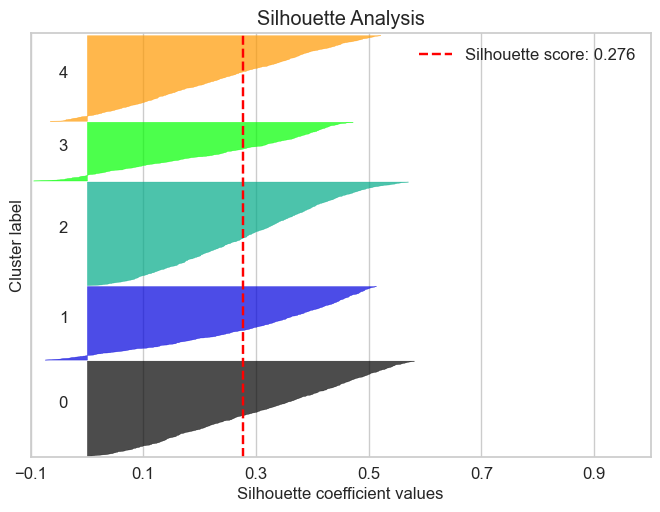

In [97]:
plot_silhouette(arr,model.labels_) # to check for 5 clusters

# 6.2 DBSCAN

DBSCAN is a density-based clustering algorithm that groups together data points that are close to each other and separates them from data points that are far away. It works by identifying "core points" that have a minimum number of neighboring points within a certain distance, and then expanding clusters by including all nearby points that are not already assigned to a cluster. DBSCAN can handle arbitrary cluster shapes and is particularly effective for datasets with varying density and noise. However, it can be sensitive to the choice of distance metric and clustering parameters.

In [76]:
# create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=3,n_jobs=-1)

# fit the data to the model
dbscan.fit(arr)

DBSCAN(min_samples=3, n_jobs=-1)

In [77]:
dbscan.labels_.shape

(4338,)

In [188]:
np.unique(dbscan.labels_)

NameError: name 'dbscan' is not defined

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

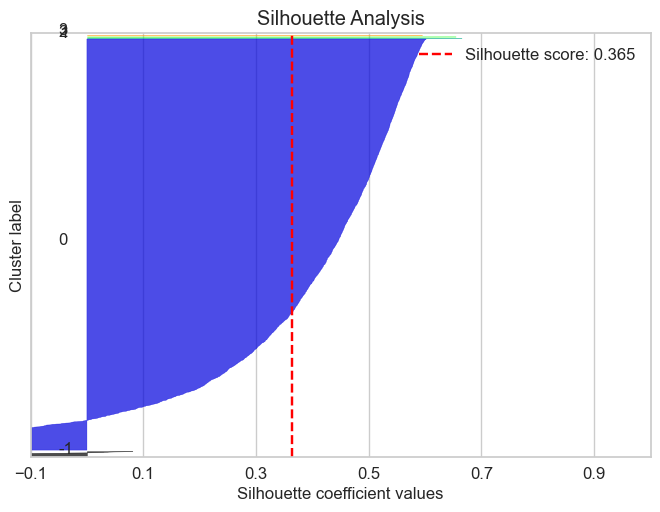

In [79]:
plot_silhouette(arr,dbscan.labels_)

### Conclusions:
- KNN:
    - For three clusters,the silhouette score is 0.299
    - For three clusters,the silhouette score is 0.302
- DB Scan
    - For DB Scan,While the silhoutee score is 0.365, the above plot suggest huge imbalance as more customers are pooled in cluster 0 and very few are in other clusters.
- I'll perform cluster interpretation to check if I can find a distinct pattern in 4 clusters. If not,I'll investigate DBScan further    
   

# 7.Cluster Interpretation

## Snake Plots
we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, we can have a good visualization from the data on how the cluster differs from each other.

In [77]:
# Create the dataframe
df_normalized = pd.DataFrame(arr, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

Recency  Frequency  MonetaryValue  ID  Cluster
0  1.620274  -2.577079       3.140439   0        0
1 -1.738803   1.177777       1.378499   1        3
2  0.299813  -0.213306       0.753480   2        0
3 -0.703409   0.444043       0.736908   3        3
4  1.572616  -0.657466      -0.586537   4        1

In [ ]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'], # columns to keep as identifier variables, which are 'ID' and 'Cluster'
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

In [79]:
df_nor_melt.groupby('Cluster')

In [80]:
df_nor_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         13014 non-null  int64  
 1   Cluster    13014 non-null  int32  
 2   Attribute  13014 non-null  object 
 3   Value      13014 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 356.0+ KB


In [81]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(2)

fig3.head()

Cluster  Count  percent
0        0   3657    28.10
1        1   3309    25.43
2        2   2910    22.36
3        3   3138    24.11

In [82]:
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Cluster'],values='Count'
                 , width=800, height=400
                 ,title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

 Data is evenly distributed

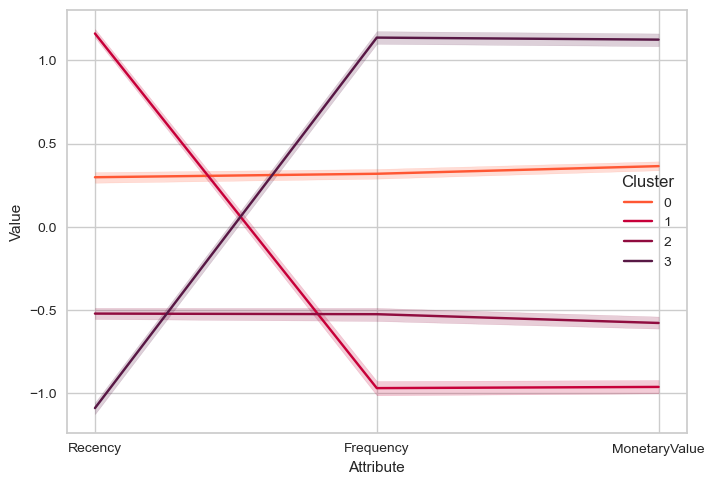

In [83]:
# Visualize it
custom_palette = sns.color_palette(['#FF5733', '#C70039', '#900C3F', '#581845'])
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt,palette=custom_palette);

From the above snake plot, we can see the distribution of recency, frequency, and monetary metric values across the four clusters. The four clusters seem to be separate from each other, which indicates a good heterogeneous mix of clusters.

| Cluster | Type of Cluster | % |                           RFM Interpretation                                               |
| ------- | -------------- | - | ----------------- |
| 0       |  At risk customers  | 28% | 	 Customer who made their last transaction a while ago and who made frequent and large purchases in the past.|
| 1       | Lost customers/churned customers | 25.43% |Customers who made their last transaction a long time ago, and who have made few purchases. Therefore, it could be the cluster of Lost customer/churned customers.|
| 2       | New customers | 22.36% | Customers who transacted recently and have a lower purchase frequency, with a low amount of monetary spending.|
| 3       | Loyal customers | 24.11% | Most frequent customers with the highest monetary spending amount and transact most recently
|

In [86]:
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster
0      12346      326          1       77183.60        0
1      12347        2        182        4310.00        3
2      12348       75         31        1797.24        0
3      12349       19         73        1757.55        3
4      12350      310         17         334.40        1

In [83]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2) #to analyse means of each cluster

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         92.85     74.14       1455.91  1219
1        221.78     15.60        289.91  1103
2         31.86     26.29        428.61   970
3         14.32    248.19       6096.49  1046

In [91]:
rfm.mean()

CustomerID               inf
Recency            92.536422
Frequency          90.523744
MonetaryValue    2048.688081
Cluster             1.424850
dtype: float64

In [106]:
cluster_avg = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':'mean'}).round(2)
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

Cluster  CustomerID  Frequency  MonetaryValue   Recency
Cluster                                                         
0            NaN         NaN  -0.180988      -0.289345 -0.002231
1            NaN         NaN  -0.827670      -0.858490  1.391059
2            NaN         NaN  -0.709579      -0.790788 -0.661755
3            NaN         NaN   1.741712       1.975802 -0.850545

- It can be observed that for each cluster,one of the RFM factors are a prioity.I'll explore further in the visualisation.

In [71]:
#to plot graphs with respect to each of the variables,I decided to drop outliers as they are skewing the plots. 7
#For the esthetics of the graph,I'll drop them only for visualisation.

rfm_fig = rfm.copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['MonetaryValue']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

3943/4338 data points remain.
3581/3943 data points remain.
3223/3581 data points remain.


# Recency Vs frequency

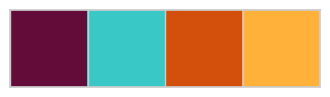

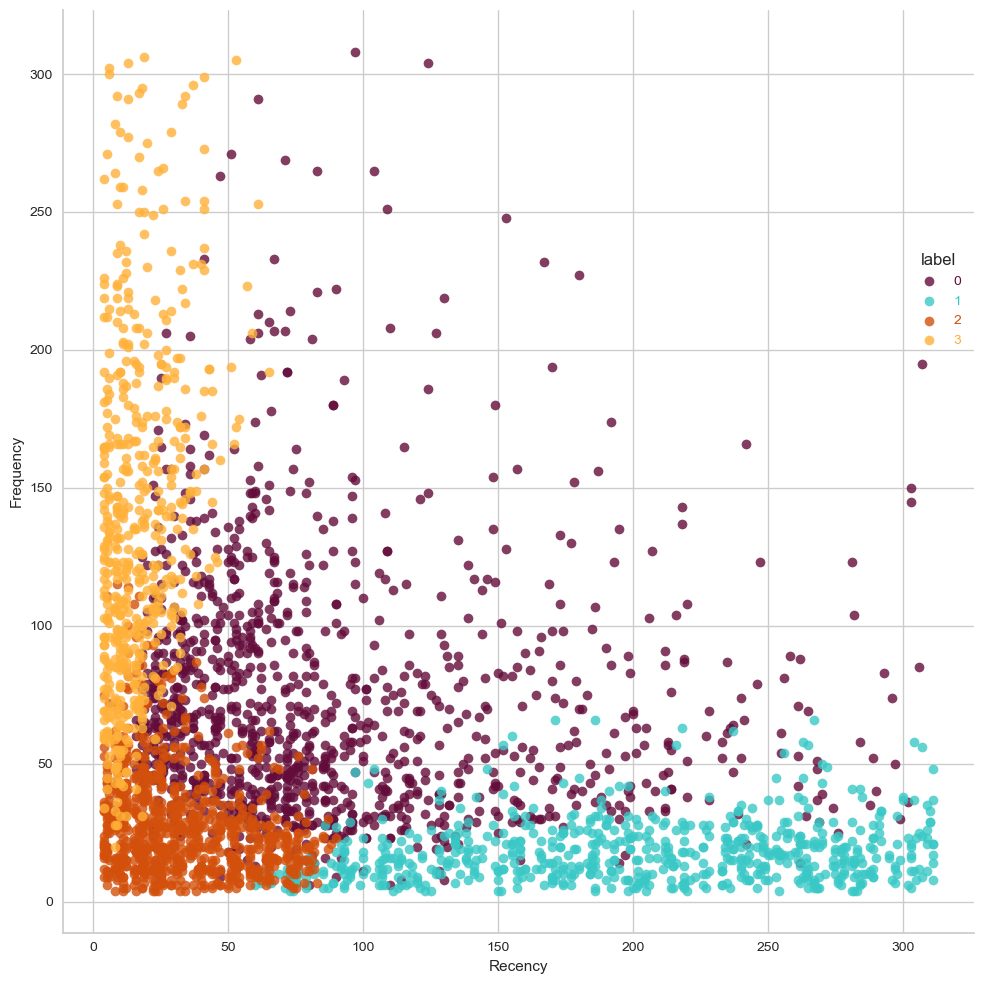

In [72]:
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Customer ID','Cluster','Recency','Frequency','MonetaryValue'])

#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

- A high frequency is found with customers who have a recent purchase within a month.


# Frequency Vs Monetary

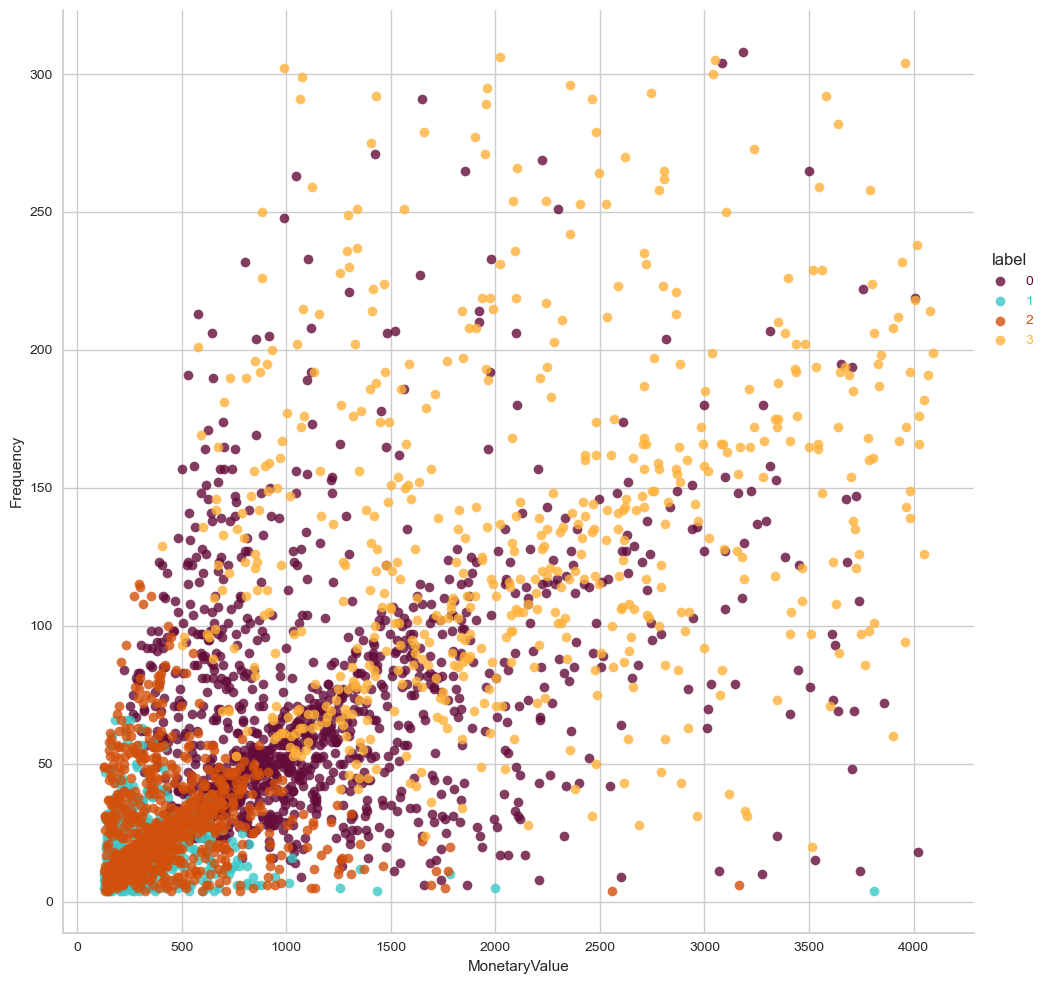

In [108]:
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='MonetaryValue', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

Customers who buy frequently spend less money.

In [73]:
rfm_fig['Cluster'] = rfm_fig['Cluster'].astype(str)

import plotly.express as px
fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='MonetaryValue',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In the above plot, the color specifies Cluster. From the above plot, we can see how the customers are spread among Recency, Frequency and Monetary dimension. Customers in Cluster 1 have made recent purchases with a high frequency, but with lower amounts. The reason for this could be that the customer frequently purchase Accessories that are not so expensive.

We can also use the following method to understand the relative importance of segments in the data. To do this, we will complete the following steps:

Calculate average values of each cluster
Calculate average values of population
Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

In [85]:
cluster_avg = rfm[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','MonetaryValue']].head().mean()

In [95]:
cluster_avg

Recency   Frequency  MonetaryValue
Cluster                                       
0         92.849057   74.143560    1455.911118
1        221.783318   15.599275     289.905947
2         31.858763   26.289691     428.613403
3         14.320268  248.187380    6096.493289

In [87]:
population_avg

Recency            147.000
Frequency           60.800
MonetaryValue    17076.558
dtype: float64

In [88]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.37       0.22          -0.91
1           0.51      -0.74          -0.98
2          -0.78      -0.57          -0.97
3          -0.90       3.08          -0.64

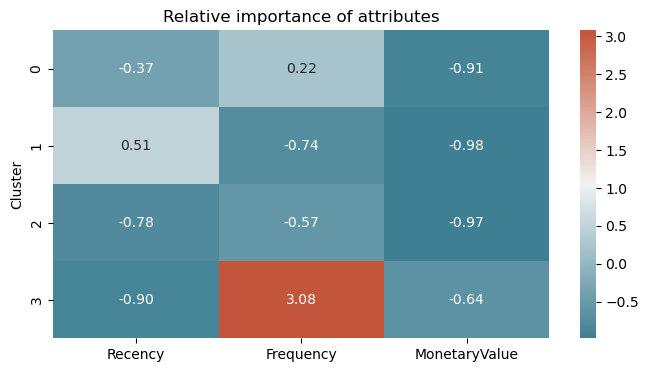

In [89]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

- Outliers are hindering the heatmap. So,It is plotted after removing them below

In [92]:
cluster_no_outliers=data 

In [94]:
cluster_no_outliers

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice CustomerID         Country  order_canceled  \
0       2010-12-01       2.55      17850  United Kingdom               0   
1       2010-12-01       3.39      17850  United Kingdom               0   
2       2010-12-01       2.75      17850  United Kingdom               0   
3       2010-12-01       3.39      17850  United Kingdom               0   
4       2010-12-01       3.39      17850  United Kingdom               0   
...            ...        ...        ...             ...             ...   
541904  2011-12-09       0.85      12680          France               0   
541905  2011-12-09       2.10      12680          France               0   
541906  2011-12-09       4.15      12680          France               0   
541907  2011-12-09       4.15      12680          France               0   
541908  2011-12-09       4.95      12680          France               0   

        TotalPrice  
0            15.30  
1            20.34  
2            22.00  
3            20.34  
4            20.34  
...            ...  
541904       10.20  
541905       12.60  
541906       16.60  
541907       16.60  
541908       14.85  

[392692 rows x 10 columns]

In [96]:
cluster_avg_no_outliers = cluster_no_outliers[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg_no_outliers = cluster_no_outliers[['Recency','Frequency','MonetaryValue']].head().mean()

In [122]:
relative_imp_no_outliers = cluster_avg_no_outliers / population_avg_no_outliers - 1
relative_imp_no_outliers.round(2)

Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.35       0.39          -0.19
1           0.48      -0.65          -0.78
2          -0.76      -0.47          -0.70
3          -0.88       1.57           0.41

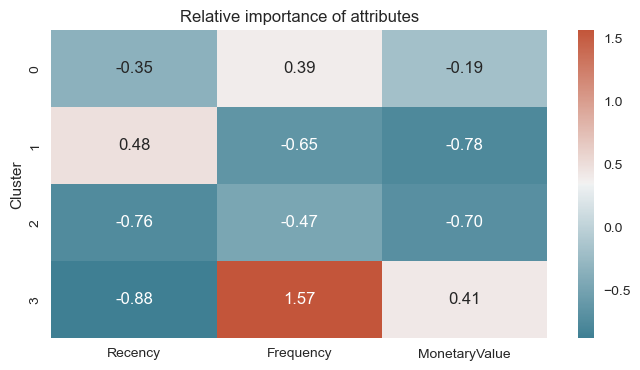

In [123]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp_no_outliers, annot=True, fmt='.2f', cmap=cmap)
plt.show()

# Interpret the result
From the above analysis, we can see that there should be 4 clusters in our data. To understand what these 4 clusters mean in a business scenario, we should look back the table comparing the clustering performance of 3 and 4 clusters for the mean values of recency, frequency, and monetary metric.

Below is the table giving the RFM interpretation of each segment and the points that a company is recommended to keep in mind while designing the marketing strategy for that segment of customers.


| Cluster | Type of Cluster | % |                           RFM Interpretation                                               |
| ------- | -------------- | - | ----------------- |
| 0       |  At risk customers  | 28% | 	 Customer who made their last transaction a while ago and who made frequent and large purchases in the past.|
| 1       | Lost customers/churned customers | 25.43% |Customers who made their last transaction a long time ago, and who have made few purchases. Therefore, it could be the cluster of Lost customer/churned customers.|
| 2       | New customers | 22.36% | Customers who transacted recently and have a lower purchase frequency, with a low amount of monetary spending.|
| 3       | Loyal customers | 24.11% | Most frequent customers with the highest monetary spending amount and transact most recently
|

# 8.Cluster Exploration for more insights

# 8.1 RFM Score Calculation 

In [97]:
# Create the quartiles scores
quartiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
quartiles

Recency  Frequency  MonetaryValue  Cluster
0.2     13.8       14.0        249.344      0.0
0.4     33.0       29.0        487.412      1.0
0.6     72.0       57.0        933.348      2.0
0.8    180.0      120.0       2055.050      3.0

In [98]:
quartiles = quartiles.to_dict()


In [99]:
quartiles

{'Recency': {0.2: 13.800000000000182, 0.4: 33.0, 0.6: 72.0, 0.8: 180.0},
 'Frequency': {0.2: 14.0, 0.4: 29.0, 0.6: 57.0, 0.8: 120.0},
 'MonetaryValue': {0.2: 249.34400000000008,
  0.4: 487.4120000000001,
  0.6: 933.348,
  0.8: 2055.0500000000006},
 'Cluster': {0.2: 0.0, 0.4: 1.0, 0.6: 2.0, 0.8: 3.0}}

In [100]:
def RScore(x,p,d): #the ranges 0.2,0.4,0.6,0.8 are defined to Score RFM by their quartile. it is silimar to binning.
    if x <= d[p][0.2]: 
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1   
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5       


In [101]:
rfm['R']=rfm['Recency'].apply(RScore,args=('Recency',quartiles))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quartiles,))
rfm['M'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quartiles,))

In [102]:
rfm['R']

0       1
1       5
2       2
3       4
4       1
       ..
4333    1
4334    1
4335    5
4336    5
4337    3
Name: R, Length: 4338, dtype: int64

# Calculate the overall RFM score
This step can be done in two ways:

Concatenation: creates segments Here we just concatenate (not add) the individual RFM score like strings and get labeled segments in return. Our best segment will be 444 and our worst will be 111 — signifying the lowest score on all three of the RFM categories.

Addition: creates a score Here we add the individual RFM scores like numbers and get a number in return indicating the customer score. The score will range from 3 to 12 and we can use this to create more human friendly labelled categories.

In [103]:
#Concat RFM Quartile values to create RFM Segments
def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])
rfm['RFM_Segment']=rfm.apply(join_rfm,axis=1) #concatenate
#calculating RFM Score
rfm['RFM_Score']=rfm[['R','F','M']].sum(axis=1) #to sum

In [104]:
rfm['RFM_Segment'].unique()

array(['115', '555', '234', '444', '122', '345', '111', '144', '112',
       '445', '355', '524', '223', '544', '123', '511', '344', '334',
       '433', '522', '255', '233', '423', '442', '244', '324', '455',
       '312', '245', '333', '323', '554', '133', '545', '235', '411',
       '322', '211', '422', '325', '533', '534', '222', '214', '155',
       '412', '121', '224', '331', '134', '311', '421', '434', '343',
       '435', '512', '353', '321', '145', '413', '432', '225', '232',
       '535', '523', '543', '253', '114', '515', '335', '443', '231',
       '313', '212', '143', '514', '431', '213', '243', '124', '552',
       '414', '113', '454', '221', '424', '132', '513', '354', '532',
       '342', '131', '453', '341', '521', '541', '141', '142', '553',
       '531', '254', '215', '242', '332', '525', '153', '542', '315',
       '135', '154', '152', '125', '352', '241', '314', '441', '415',
       '425'], dtype=object)

After calculations on the RFM data we can create customer segments that are actionable and easy to understand — like the ones below:

- Champions: Bought recently, buy often and spend the most
- Loyal customers: Buy on a regular basis. Responsive to promotions.
- Potential loyalist: Recent customers with average frequency.
- Recent customers: Bought most recently, but not often.
- Promising: Recent shoppers, but haven’t spent much.
- Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.
- About to sleep: Below average recency and frequency. Will lose them if not reactivated.
- At risk: Some time since they’ve purchased. Need to bring them back!
- Can’t lose them: Used to purchase frequently but haven’t returned for a long time.
- Hibernating: Last purchase was long back and low number of orders. May be lost.

### 8.2 RFM Segmentation

In [105]:
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M RFM_Segment  \
0      12346      326          1       77183.60        0  1  1  5         115   
1      12347        3        182        4310.00        3  5  5  5         555   
2      12348       76         31        1797.24        0  2  3  4         234   
3      12349       19         73        1757.55        3  4  4  4         444   
4      12350      311         17         334.40        1  1  2  2         122   

   RFM_Score  
0          7  
1         15  
2          9  
3         12  
4          5

In [106]:
# Create human friendly RFM labels
segt_map = {
    
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}


In [107]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) #converting to string to map
rfm['Segment']

0       11
1       55
2       23
3       44
4       12
        ..
4333    11
4334    11
4335    51
4336    55
4337    34
Name: Segment, Length: 4338, dtype: object

In [108]:
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm['Segment'] #replace

0           Hibernating
1             Champions
2               At risk
3       Loyal customers
4           Hibernating
             ...       
4333        Hibernating
4334        Hibernating
4335      New customers
4336          Champions
4337    Loyal customers
Name: Segment, Length: 4338, dtype: object

In [109]:
# Create some human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'
#This is silimar to lifetime value of the customer.

In [110]:
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M RFM_Segment  \
0      12346      326          1       77183.60        0  1  1  5         115   
1      12347        3        182        4310.00        3  5  5  5         555   
2      12348       76         31        1797.24        0  2  3  4         234   
3      12349       19         73        1757.55        3  4  4  4         444   
4      12350      311         17         334.40        1  1  2  2         122   

   RFM_Score          Segment     Score  
0          7      Hibernating    Bronze  
1         15        Champions  Platinum  
2          9          At risk    Silver  
3         12  Loyal customers  Platinum  
4          5      Hibernating     Green

In [111]:
sns.set_theme(style="whitegrid")

In [112]:
fig1 = rfm.groupby(['Segment']).count()
fig1

CustomerID  Recency  Frequency  MonetaryValue  Cluster  \
Segment                                                                       
About to sleep              323      323        323            323      323   
At risk                     566      566        566            566      566   
Can't lose them              81       81         81             81       81   
Champions                   604      604        604            604      604   
Hibernating                1080     1080       1080           1080     1080   
Loyal customers             817      817        817            817      817   
Need attention              204      204        204            204      204   
New customers                57       57         57             57       57   
Potential loyalists         494      494        494            494      494   
Promising                   112      112        112            112      112   

                        R     F     M  RFM_Segment  RFM_Score  Score  
Segment                                                               
About to sleep        323   323   323          323        323    323  
At risk               566   566   566          566        566    566  
Can't lose them        81    81    81           81         81     81  
Champions             604   604   604          604        604    604  
Hibernating          1080  1080  1080         1080       1080   1080  
Loyal customers       817   817   817          817        817    817  
Need attention        204   204   204          204        204    204  
New customers          57    57    57           57         57     57  
Potential loyalists   494   494   494          494        494    494  
Promising             112   112   112          112        112    112

In [93]:
fig1 = rfm.groupby(['Segment']).count().unstack().fillna(0) #to pivot the table and fill any missing values
fig2=rfm.groupby(['Score']).count().unstack().fillna(0)

In [94]:
fig2 # to check with respect to customerID and scores

               Score   
CustomerID     Bronze       766
               Gold         345
               Green        903
               Platinum    1596
               Silver       728
Recency        Bronze       766
               Gold         345
               Green        903
               Platinum    1596
               Silver       728
Frequency      Bronze       766
               Gold         345
               Green        903
               Platinum    1596
               Silver       728
MonetaryValue  Bronze       766
               Gold         345
               Green        903
               Platinum    1596
               Silver       728
Cluster        Bronze       766
               Gold         345
               Green        903
               Platinum    1596
               Silver       728
R              Bronze       766
               Gold         345
               Green        903
               Platinum    1596
               Silver       728
F              B

### 8.3 Segment Visualisation

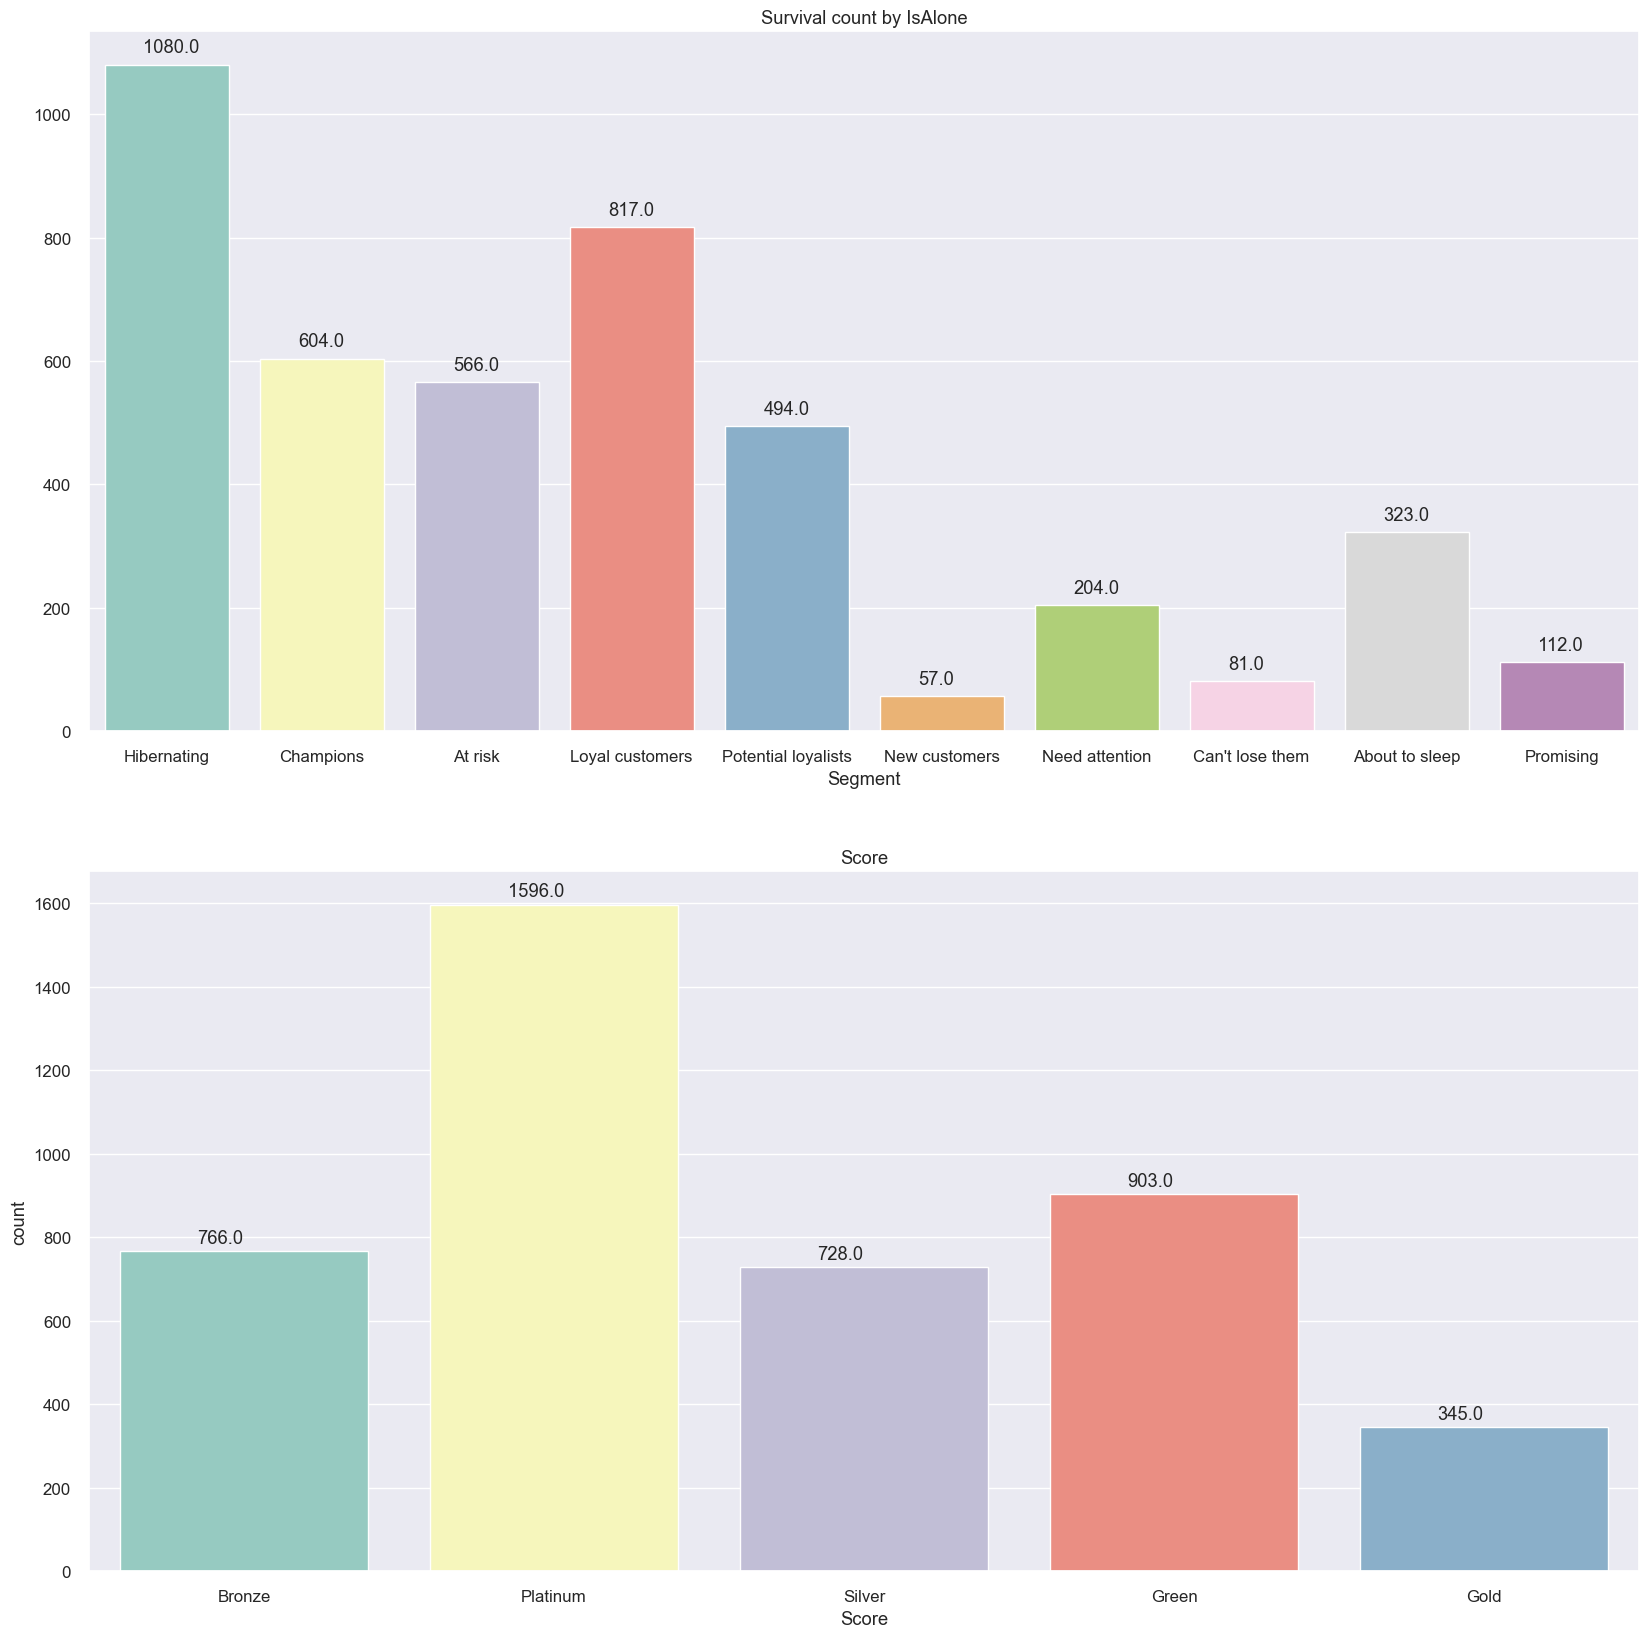

In [95]:
import matplotlib.pyplot as plt


sns.set(font_scale=1.1)

#Pie Chart
f,ax=plt.subplots(2,1,figsize=(20,20))
sns.countplot('Segment',data=rfm,ax=ax[0],palette="Set3")
ax[0].set_title('Segment')
ax[0].set_ylabel('')
ax[0].set_title('Segment count')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#Bar chart - count
sns.countplot('Score',data=rfm,ax=ax[1],palette="Set3")
ax[1].set_title('Score')

for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))


plt.show()

Max. No. of customer are hibernating
There are more number of customers in platinum despite having more hibernation because they spent lot of money in the past.

In [113]:
# Aggregate data by each customer
fig3 = rfm.groupby('Segment').agg({'CustomerID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'CustomerID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Segment  Count  percent
0   About to sleep    323      7.4
1          At risk    566     13.0
2  Can't lose them     81      1.9
3        Champions    604     13.9
4      Hibernating   1080     24.9

#### 8.4 Customer Classification using RFM Segment

In [97]:
#Creating a Treemap with Plotly Express 
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#83af70','#9fbf8f','#bad0af','#d5e0cf','#f1f1f1','#f1d4d4','#f0b8b8','#ec9c9d'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Segment'],values='Count'
                 , width=800, height=400
                 ,title="RFM Segments")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [98]:
# Aggregate data by each customer
fig4 = rfm.groupby('Score').agg({'CustomerID': lambda x: len(x)}).reset_index()


# Rename columns
fig4.rename(columns={'CustomerID': 'Count'}, inplace=True)
fig4['percent'] = (fig4['Count'] / fig4['Count'].sum()) * 100
fig4['percent'] = fig4['percent'].round(1)

fig4.head()

Score  Count  percent
0    Bronze    766     17.7
1      Gold    345      8.0
2     Green    903     20.8
3  Platinum   1596     36.8
4    Silver    728     16.8

In [99]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig4, path=['Score'],values='Count'
                 , width=800, height=400
                 ,title="Treemap of RFM Score")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [100]:
# Aggregate data by each customer
fig5 = rfm.groupby(['Cluster', 'Segment', 'Score']).agg({'CustomerID': lambda x: len(x)}).reset_index()

# Rename columns
fig5.rename(columns={'CustomerID': 'Count'}, inplace=True)
fig5['percent'] = (fig5['Count'] / fig5['Count'].sum()) * 100
fig5['percent'] = fig5['percent'].round(1)

fig5.head()
#colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
colors = ['#FFC312', '#C4E538', '#12CBC4', '#FDA7DF']
import plotly.express as px
fig = px.treemap(fig5, path=[px.Constant("Customer"), 'Cluster', 'Segment', 'Score'], values='Count'
                ,title="Treemap of Customer Segment")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

# Using RFM segment to Interpret the result

In [101]:
# Aggregate data by each customer
rfm1 = rfm.groupby(['Cluster','Segment'],).agg({'CustomerID': lambda x: len(x)}).reset_index()

# Rename columns
rfm1.rename(columns={'CustomerID': 'Count'}, inplace=True)
rfm1['percent'] = (rfm1['Count'] / rfm1.groupby('Cluster')['Count'].transform('sum')) * 100
rfm1['percent'] = rfm1['percent'].round(1)

rfm1

Cluster              Segment  Count  percent
0         0       About to sleep     26      2.1
1         0              At risk    449     36.8
2         0      Can't lose them     78      6.4
3         0          Hibernating     86      7.1
4         0      Loyal customers    384     31.5
5         0       Need attention    136     11.2
6         0  Potential loyalists     60      4.9
7         1       About to sleep     41      3.7
8         1              At risk    112     10.2
9         1          Hibernating    948     85.9
10        1            Promising      2      0.2
11        2       About to sleep    256     26.4
12        2              At risk      5      0.5
13        2            Champions     24      2.5
14        2          Hibernating     46      4.7
15        2      Loyal customers     34      3.5
16        2       Need attention     68      7.0
17        2        New customers     54      5.6
18        2  Potential loyalists    373     38.5
19        2            Promising    110     11.3
20        3      Can't lose them      3      0.3
21        3            Champions    580     55.4
22        3      Loyal customers    399     38.1
23        3        New customers      3      0.3
24        3  Potential loyalists     61      5.8

The final conclusions are provided at the end of the notebook regarding findings in KNN.

# 9 : Stemming and Bag of Words(Product Visualisation on Clusters)

In [103]:
data = pd.read_csv('data.csv')

In [115]:
data['order_canceled'].value_counts()

0    392692
Name: order_canceled, dtype: int64

In [116]:
rfm['Cluster'].value_counts()

0    1219
1    1103
3    1046
2     970
Name: Cluster, dtype: int64

In [117]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  order_canceled  \
0  2010-12-01       2.55      17850  United Kingdom               0   
1  2010-12-01       3.39      17850  United Kingdom               0   
2  2010-12-01       2.75      17850  United Kingdom               0   
3  2010-12-01       3.39      17850  United Kingdom               0   
4  2010-12-01       3.39      17850  United Kingdom               0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [210]:
rfm.shape

(4338, 12)

In [212]:
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M RFM_Segment  \
0      12346      326          1       77183.60        0  1  1  5         115   
1      12347        2        182        4310.00        3  5  5  5         555   
2      12348       75         31        1797.24        0  2  3  4         234   
3      12349       19         73        1757.55        3  4  4  4         444   
4      12350      310         17         334.40        1  1  2  2         122   

   RFM_Score          Segment     Score  
0          7      Hibernating    Bronze  
1         15        Champions  Platinum  
2          9          At risk    Silver  
3         12  Loyal customers  Platinum  
4          5      Hibernating     Green

In [213]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  \
0  2010-12-01 08:26:00       2.55       17850  United Kingdom               0   
1  2010-12-01 08:26:00       3.39       17850  United Kingdom               0   
2  2010-12-01 08:26:00       2.75       17850  United Kingdom               0   
3  2010-12-01 08:26:00       3.39       17850  United Kingdom               0   
4  2010-12-01 08:26:00       3.39       17850  United Kingdom               0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [118]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [119]:
merged_data = data.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID', how='left')

In [120]:
merged_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  order_canceled  \
0  2010-12-01       2.55      17850  United Kingdom               0   
1  2010-12-01       3.39      17850  United Kingdom               0   
2  2010-12-01       2.75      17850  United Kingdom               0   
3  2010-12-01       3.39      17850  United Kingdom               0   
4  2010-12-01       3.39      17850  United Kingdom               0   

   TotalPrice  Cluster  
0       15.30        0  
1       20.34        0  
2       22.00        0  
3       20.34        0  
4       20.34        0

In [121]:
merged_data['Cluster'].value_counts()

3    259604
0     90381
2     25501
1     17206
Name: Cluster, dtype: int64

In [109]:
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on a text string
def stem_text(text):
    words = nltk.word_tokenize(text.lower())
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [241]:
# Apply stemming to the 'Description' column of the dataframe
merged_data['stemmed_description'] = merged_data['Description'].apply(stem_text)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the stemmed descriptions
vectorizer.fit(merged_data['stemmed_description'])

# Transform the stemmed descriptions into TF-IDF vectors
tfidf_matrix = vectorizer.transform(merged_data['stemmed_description'])

# Compute the average TF-IDF vector for each cluster
cluster_means = []
for cluster in set(merged_data['Cluster']):
    cluster_indices = merged_data[merged_data['Cluster'] == cluster].index
    cluster_tfidf = tfidf_matrix[cluster_indices].toarray()
    cluster_mean = cluster_tfidf.mean(axis=0)
    cluster_means.append(cluster_mean)


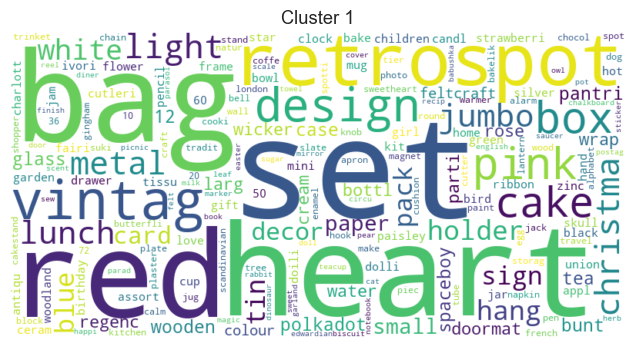

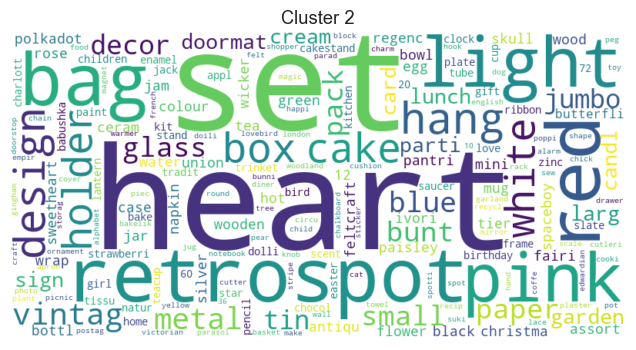

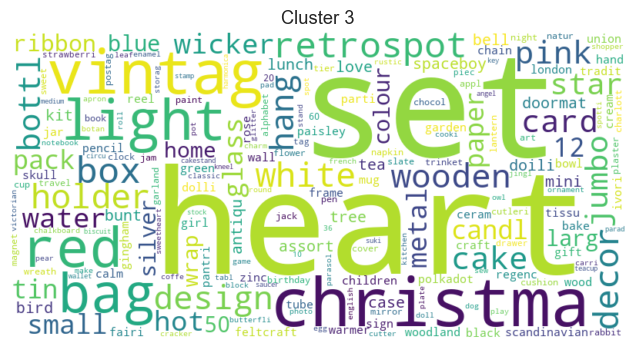

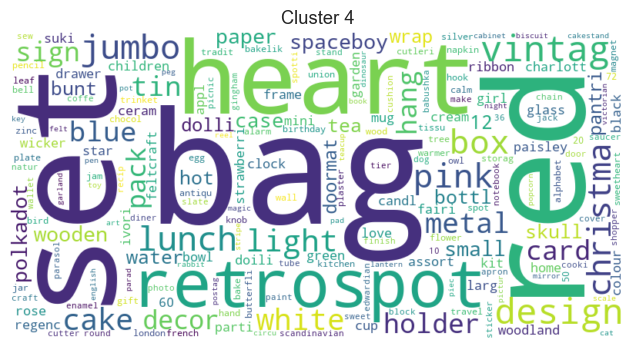

In [242]:
# Convert the cluster means to a dataframe
cluster_df = pd.DataFrame(cluster_means, columns=vectorizer.get_feature_names())

# Generate a word cloud for each cluster
for i, cluster_mean in enumerate(cluster_means):
    word_scores = list(zip(vectorizer.get_feature_names(), cluster_mean))
    word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_scores))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i+1}")
    plt.show()

# Product Insights for Each cluster:
   - I made an effort to pick if there are any patterns with respect to each cluster. While there are many products repeating in every cluster,a few insights are drawn
            - Risky Customers: Red Heart.Bag,Vintag,retrospot,design
            - Churn Customers: Heart,set,pink
            - New Customers: Heart Set,Christmas
            -Loyal Customers: Bags are their primary product
    - This analysis helps to understand the go to products for each cluster.
    - Interesting Insight: Cluster 3: New Customers conducted more Christmas shopping.
       
    
    

# 10.Feature Selection
 - Feature Selection(Chi Square and correlation factor) & Feature Engineering(Features from Part 8 were used)

In [243]:
rfm.shape

(4338, 12)

In [249]:
rfm

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M  \
0         12346      326          1       77183.60        0  1  1  5   
1         12347        2        182        4310.00        3  5  5  5   
2         12348       75         31        1797.24        0  2  3  4   
3         12349       19         73        1757.55        3  4  4  4   
4         12350      310         17         334.40        1  1  2  2   
...         ...      ...        ...            ...      ... .. .. ..   
4333      18280      278         10         180.60        1  1  1  1   
4334      18281      181          7          80.82        1  1  1  1   
4335      18282        8         12         178.05        2  5  1  1   
4336      18283        4        721        2045.53        3  5  5  4   
4337      18287       43         70        1837.28        0  3  4  4   

     RFM_Segment  RFM_Score          Segment     Score  
0            115          7      Hibernating    Bronze  
1            555         15        Champions  Platinum  
2            234          9          At risk    Silver  
3            444         12  Loyal customers  Platinum  
4            122          5      Hibernating     Green  
...          ...        ...              ...       ...  
4333         111          3      Hibernating     Green  
4334         111          3      Hibernating     Green  
4335         511          7    New customers    Bronze  
4336         554         14        Champions  Platinum  
4337         344         11  Loyal customers  Platinum  

[4338 rows x 12 columns]

In [250]:
rfm['CustomerID'].nunique()

4338

In [251]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4338 non-null   object 
 1   Recency        4338 non-null   int32  
 2   Frequency      4338 non-null   int64  
 3   MonetaryValue  4338 non-null   float64
 4   Cluster        4338 non-null   int32  
 5   R              4338 non-null   int64  
 6   F              4338 non-null   int64  
 7   M              4338 non-null   int64  
 8   RFM_Segment    4338 non-null   object 
 9   RFM_Score      4338 non-null   int64  
 10  Segment        4338 non-null   object 
 11  Score          4338 non-null   object 
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 372.9+ KB


In [111]:
rfm

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M  \
0         12346      326          1       77183.60        0  1  1  5   
1         12347        3        182        4310.00        3  5  5  5   
2         12348       76         31        1797.24        0  2  3  4   
3         12349       19         73        1757.55        3  4  4  4   
4         12350      311         17         334.40        1  1  2  2   
...         ...      ...        ...            ...      ... .. .. ..   
4333      18280      278         10         180.60        1  1  1  1   
4334      18281      181          7          80.82        1  1  1  1   
4335      18282        8         12         178.05        2  5  1  1   
4336      18283        4        721        2045.53        3  5  5  4   
4337      18287       43         70        1837.28        0  3  4  4   

     RFM_Segment  RFM_Score          Segment     Score  
0            115          7      Hibernating    Bronze  
1            555         15        Champions  Platinum  
2            234          9          At risk    Silver  
3            444         12  Loyal customers  Platinum  
4            122          5      Hibernating     Green  
...          ...        ...              ...       ...  
4333         111          3      Hibernating     Green  
4334         111          3      Hibernating     Green  
4335         511          7    New customers    Bronze  
4336         554         14        Champions  Platinum  
4337         344         11  Loyal customers  Platinum  

[4338 rows x 12 columns]

In [122]:
final_df=rfm.drop(['CustomerID'],axis=1)

In [123]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  order_canceled  \
0  2010-12-01       2.55      17850  United Kingdom               0   
1  2010-12-01       3.39      17850  United Kingdom               0   
2  2010-12-01       2.75      17850  United Kingdom               0   
3  2010-12-01       3.39      17850  United Kingdom               0   
4  2010-12-01       3.39      17850  United Kingdom               0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [124]:
temp=df.groupby('CustomerID').sum('Quantity')
temp

Quantity  UnitPrice  order_canceled  TotalPrice
CustomerID                                                 
12346          74215       1.04               0    77183.60
12347           2458     481.21               0     4310.00
12348           2341     178.71               0     1797.24
12349            631     605.10               0     1757.55
12350            197      65.30               0      334.40
...              ...        ...             ...         ...
18280             45      47.65               0      180.60
18281             54      39.36               0       80.82
18282            103      62.39               0      178.05
18283           1357    1174.33               0     2045.53
18287           1586     104.55               0     1837.28

[4338 rows x 4 columns]

In [125]:
final_df.head()

Recency  Frequency  MonetaryValue  Cluster  R  F  M RFM_Segment  RFM_Score  \
0      326          1       77183.60        0  1  1  5         115          7   
1        3        182        4310.00        3  5  5  5         555         15   
2       76         31        1797.24        0  2  3  4         234          9   
3       19         73        1757.55        3  4  4  4         444         12   
4      311         17         334.40        1  1  2  2         122          5   

           Segment     Score  
0      Hibernating    Bronze  
1        Champions  Platinum  
2          At risk    Silver  
3  Loyal customers  Platinum  
4      Hibernating     Green

In [127]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4338 non-null   int32  
 1   Frequency      4338 non-null   int64  
 2   MonetaryValue  4338 non-null   float64
 3   Cluster        4338 non-null   int32  
 4   R              4338 non-null   int64  
 5   F              4338 non-null   int64  
 6   M              4338 non-null   int64  
 7   RFM_Segment    4338 non-null   int32  
 8   RFM_Score      4338 non-null   int64  
 9   Segment        4338 non-null   object 
 10  Score          4338 non-null   object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 322.1+ KB


In [128]:
final_df['RFM_Segment']=final_df['RFM_Segment'].astype(int)

### Chi Square Test

In [129]:
# check correlation of all categorical variables with target variable using chi-square test
cat_vars=['Segment','Score']

#empty dataframe to store results
chi_df=pd.DataFrame(columns=['Feature','Chi-squared','P-value'])

# calculate chi-squared and p-value
for var in cat_vars:
    contingency_table = pd.crosstab(final_df[var], final_df['Cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_df = chi_df.append({'Feature': var, 'Chi-squared': chi2, 'P-value': p}, ignore_index=True)

# Sort results by p-value in ascending order
chi_df.sort_values(by='P-value', inplace=True)

chi_df.round(3)

Feature  Chi-squared  P-value
0  Segment     7750.081      0.0
1    Score     5559.121      0.0

We see that all our categorical features are statistically significant at an alpha of 0.05

# Correlation Test

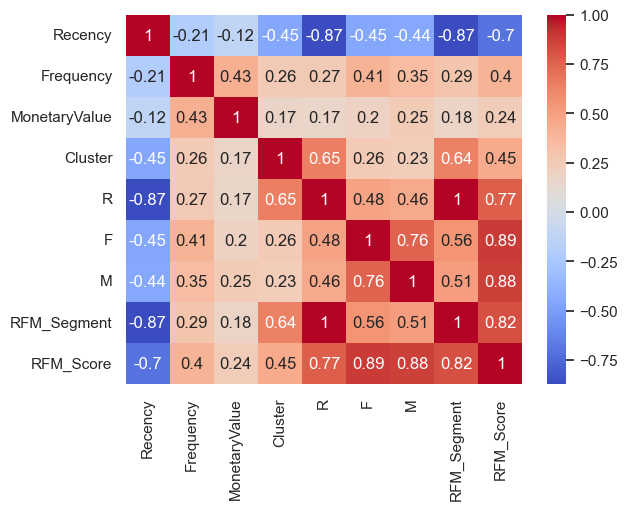

In [130]:
corr_matrix = final_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)
plt.show()

In [131]:
def correlation(dataset,threshold): #Function to filter out overly correlated factors
    col_corr=set() #Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #we are interested in absolute coeff value
                colname=corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr
    

In [132]:
corr_features=correlation(final_df,0.7) # Applied function
corr_features

{'M', 'R', 'RFM_Score', 'RFM_Segment'}

In [134]:
final_df=final_df.drop(corr_features,axis=1)


In [135]:
final_df.head()

Recency  Frequency  MonetaryValue  Cluster  F          Segment     Score
0      326          1       77183.60        0  1      Hibernating    Bronze
1        3        182        4310.00        3  5        Champions  Platinum
2       76         31        1797.24        0  3          At risk    Silver
3       19         73        1757.55        3  4  Loyal customers  Platinum
4      311         17         334.40        1  2      Hibernating     Green

In [143]:
final_df.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'Cluster', 'F', 'Segment',
       'Score'],
      dtype='object')

In [ ]:
# 11.Baseline Models:

In [138]:
final_df.to_csv('final_df.csv', index=False) #for redunduncy


In [5]:
final_df = pd.read_csv('final_df.csv')

# 11.Baseline Models

### Metrics:
    - While this is a multi-class classification problem,I understood from the cluster analysis that the data is evenly distributed.there is no imbalence in the data. So,my priliminary metric is accuracy. However,If I would like to look at the confusion matrix to understand how each model is approaching Recall,Precision and F1score

In [6]:
X=final_df[['Recency', 'Frequency', 'MonetaryValue','F', 'Segment', 'Score']]
y=final_df[['Cluster']]

In [7]:
#spliting data for both x_train and x_val for final validation
X_trainfull,X_val,y_trainfull,y_val=train_test_split(X,y,test_size=0.1, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X_trainfull,y_trainfull,test_size=0.2, random_state=42)

In [8]:
X_trainfull.shape
y_trainfull.shape

(3904, 1)

In [9]:
X_val.shape
y_val.shape

(434, 1)

In [10]:
X_train.shape
y_train.shape

(3123, 1)

In [11]:
X_test.shape
y_test.shape

(781, 1)

In [12]:
# first let's better organize our data
numeric_features = X_train.describe().columns.tolist()
categorical_features = X_train.describe(include='O').columns.tolist()

In [13]:
numeric_features
# needed them for standard scaler

['Recency', 'Frequency', 'MonetaryValue', 'F']

In [14]:
categorical_features #need them for frequency encoding

['Segment', 'Score']

In [15]:
#this is a code from sklean repository to run learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
   


In [16]:
# A function is defined which includes pipeline with a series of steps to test all the base models simultaneously
def evaluate_models(models_dict, X_train, y_train, X_test, y_test, numeric_features, categorical_features):

    # define preprocessing pipelines
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('encoder', CountEncoder())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # create an empty results dataframe
    results_df = pd.DataFrame(columns=['Model', 'Weighted F1', 'Macro F1', 'Accuracy', 'Recall', 'Precision'])

    # evaluate models
    for model_name, model in models_dict.items():

        # create a pipeline with the model
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])
        clf.fit(X_train, y_train)

        # make predictions
        y_pred = clf.predict(X_test)

        # evaluate metrics
        conf_mat = confusion_matrix(y_test, y_pred)
        wgt_f1 = f1_score(y_test, y_pred, average='weighted')
        macro_f1 = f1_score(y_test, y_pred, average='macro')
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')

        # print classification report
        class_names = ['0', '1', '2', '3']
        report = classification_report(y_test, y_pred, target_names=class_names)
        print(f"{model_name} Classification Report:\n{report}")

        # plot heatmap of confusion matrix
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f"{model_name} Confusion Matrix")
        plt.show()
        
        # plot learning curves
        title = f"{model_name} Learning Curves"
        plot_learning_curve(clf, title, X_train, y_train, cv=5)
        plt.show()

        # add results to dataframe
        results_df.loc[len(results_df)] = [model_name, wgt_f1, macro_f1, acc, recall, precision]

    return results_df


In [22]:
models_dict = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbour': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       209
           1       0.89      0.86      0.87       215
           2       0.81      0.88      0.84       180
           3       0.89      0.94      0.92       177

    accuracy                           0.86       781
   macro avg       0.86      0.86      0.86       781
weighted avg       0.86      0.86      0.86       781



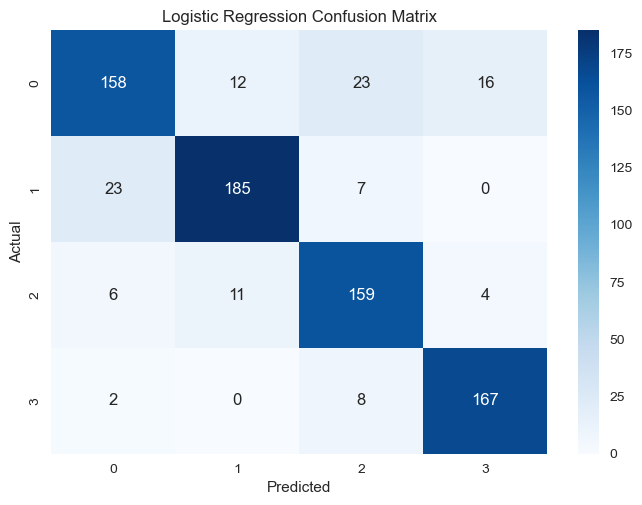

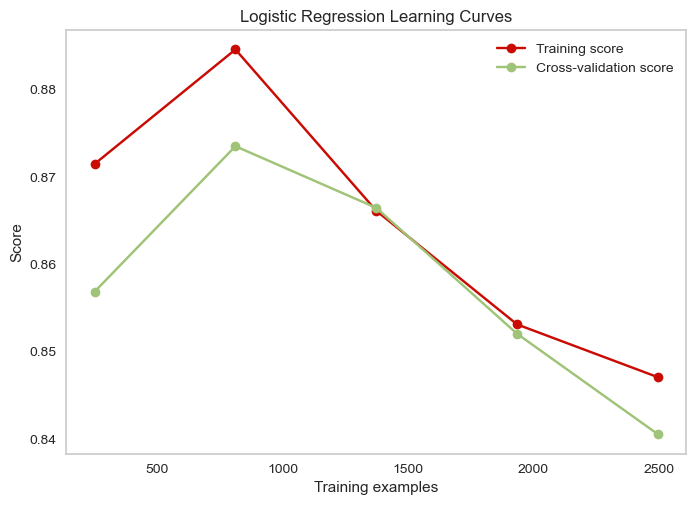

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       209
           1       0.99      0.99      0.99       215
           2       0.96      0.96      0.96       180
           3       0.96      0.99      0.98       177

    accuracy                           0.97       781
   macro avg       0.97      0.97      0.97       781
weighted avg       0.97      0.97      0.97       781



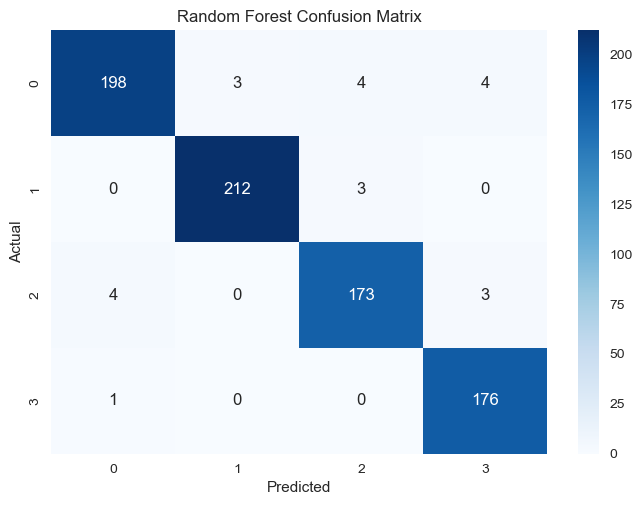

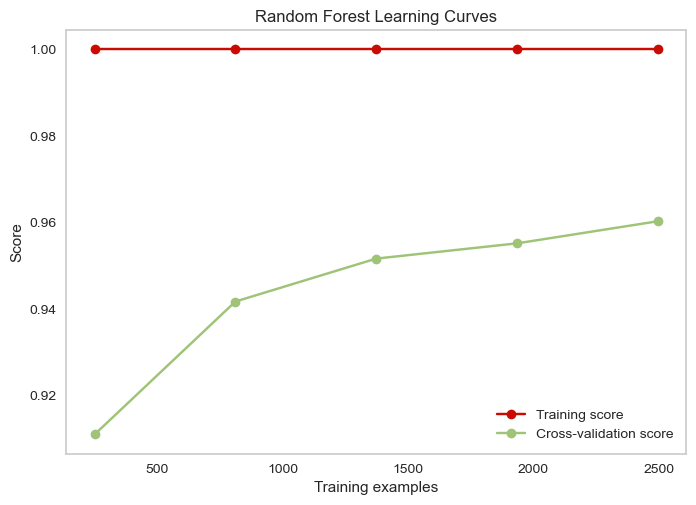

K Nearest Neighbour Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       209
           1       0.94      0.93      0.93       215
           2       0.94      0.93      0.94       180
           3       0.96      0.97      0.97       177

    accuracy                           0.93       781
   macro avg       0.93      0.93      0.93       781
weighted avg       0.93      0.93      0.93       781



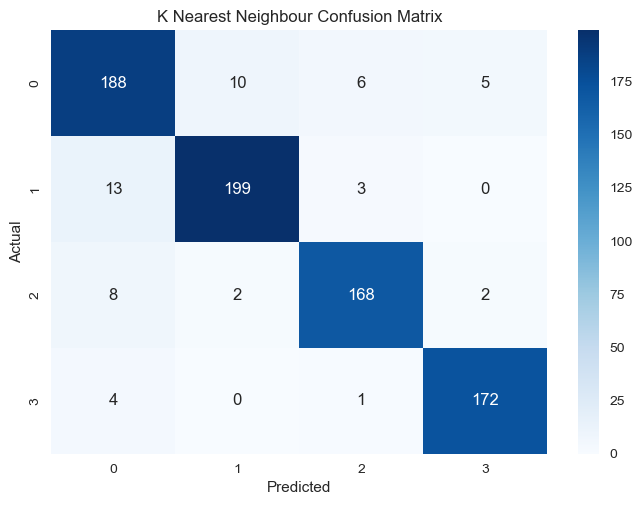

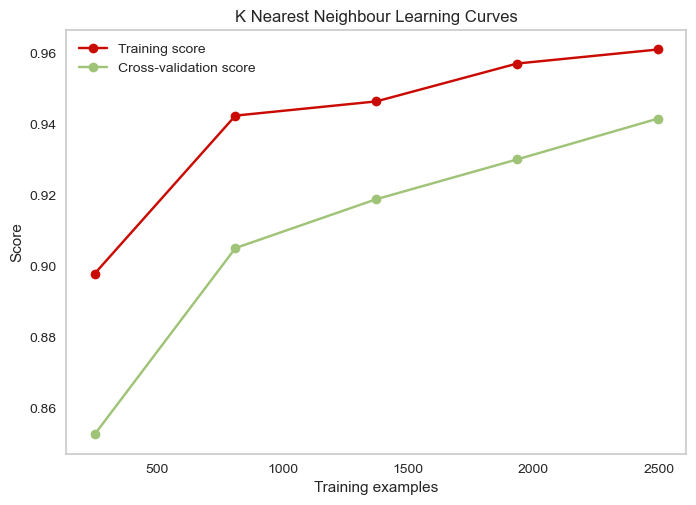

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.29      0.41       209
           1       0.89      0.86      0.87       215
           2       0.58      0.73      0.65       180
           3       0.68      1.00      0.81       177

    accuracy                           0.71       781
   macro avg       0.72      0.72      0.68       781
weighted avg       0.72      0.71      0.68       781



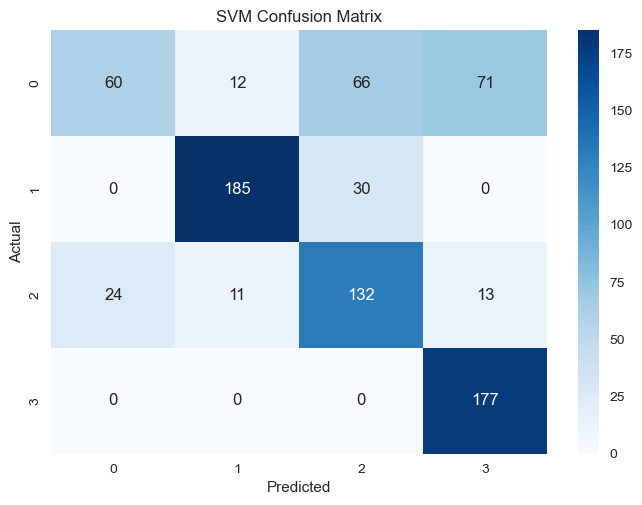

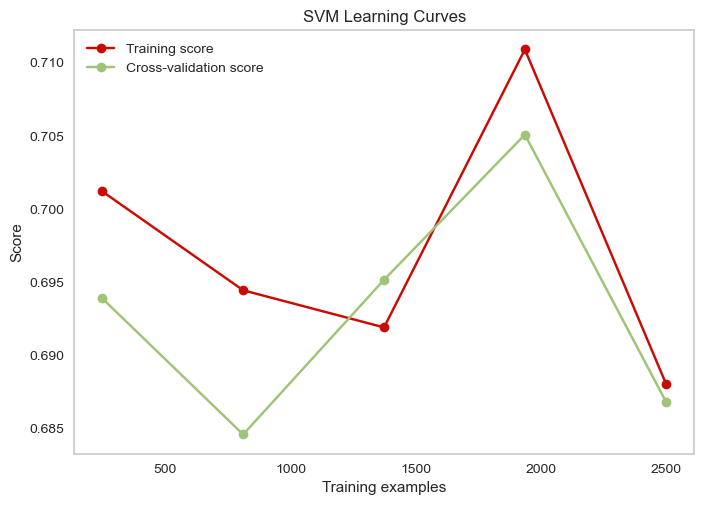

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       209
           1       0.98      0.99      0.98       215
           2       0.96      0.96      0.96       180
           3       0.98      0.99      0.99       177

    accuracy                           0.98       781
   macro avg       0.98      0.98      0.98       781
weighted avg       0.98      0.98      0.98       781



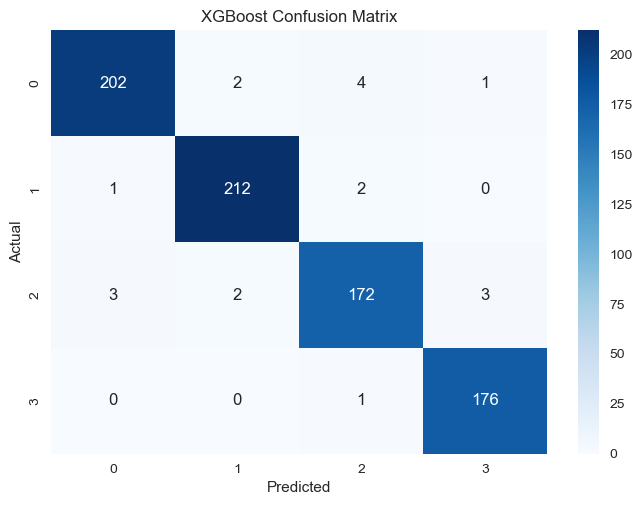

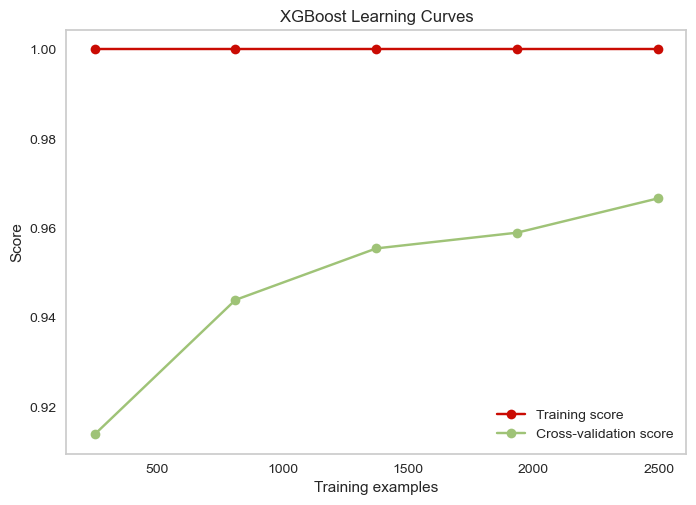

In [25]:
results_df = evaluate_models(models_dict, X_train, y_train, X_test, y_test, numeric_features, categorical_features)

| Model               | Accuracy     | Fit |
|:-------------------:|:------------:|:------------:|
| Logistic Regression | 86%          | Good         |
| Random Forest       | 97%          | Overfit      |
| SVC                 | 71%          | Good         |
| XGBOOST             | 98%          | Overfit      |

In [196]:
#models_dict

# Deep Learning Model

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3123, 6)
(781, 6)
(3123, 1)
(781, 1)


In [30]:
scaler = StandardScaler()
encoder=CountEncoder()

In [31]:
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :4])
X_train_encoded = encoder.fit_transform(X_train.iloc[:, 4:])

In [32]:
# Transform the testing data using the same fitted scaler and encoder
X_test_scaled = scaler.transform(X_test.iloc[:, :4])
X_test_encoded = encoder.transform(X_test.iloc[:, 4:])

# Combine the scaled and encoded features
X_train_final = np.hstack((X_train_scaled, X_train_encoded.to_numpy()))
X_test_final = np.hstack((X_test_scaled, X_test_encoded.to_numpy()))

In [33]:
X_train_final.shape

(3123, 6)

In [34]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [35]:
print(y_train_cat[0])
print(y_train_cat[100])

[1. 0. 0. 0.]
[0. 0. 1. 0.]


In [36]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_final.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history = model.fit(X_train_final,y_train_cat, epochs=1000, batch_size=32, validation_split=0.2)


Epoch 1/1000
79/79 [==============================] - 2s 9ms/step - loss: 5.7898 - accuracy: 0.4544 - val_loss: 1.5709 - val_accuracy: 0.5456
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9526 - accuracy: 0.6233 - val_loss: 1.0053 - val_accuracy: 0.6208
Epoch 3/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0283 - accuracy: 0.6249 - val_loss: 1.0242 - val_accuracy: 0.6368
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8855 - accuracy: 0.6537 - val_loss: 0.8047 - val_accuracy: 0.6288
Epoch 5/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.7800 - accuracy: 0.6653 - val_loss: 1.0601 - val_accuracy: 0.6224
Epoch 6/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9670 - accuracy: 0.6405 - val_loss: 1.6231 - val_accuracy: 0.4512
Epoch 7/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.6894 - val_loss: 0.8051 - val_accuracy: 0.6224
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.7974 - val_loss: 0.4413 - val_accuracy: 0.8016
Epoch 59/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.8086 - val_loss: 0.5979 - val_accuracy: 0.7648
Epoch 60/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7838 - val_loss: 0.6655 - val_accuracy: 0.7760
Epoch 61/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7970 - val_loss: 0.5465 - val_accuracy: 0.8032
Epoch 62/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7966 - val_loss: 0.4058 - val_accuracy: 0.8192
Epoch 63/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7890 - val_loss: 0.8261 - val_accuracy: 0.7408
Epoch 64/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7894 - val_loss: 0.4716 - val_accuracy: 0.8128
Epoch 65/1000

79/79 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.8002 - val_loss: 0.4130 - val_accuracy: 0.8032
Epoch 116/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8195 - val_loss: 0.3613 - val_accuracy: 0.8432
Epoch 117/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8239 - val_loss: 0.3808 - val_accuracy: 0.8384
Epoch 118/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.4016 - accuracy: 0.8147 - val_loss: 0.3535 - val_accuracy: 0.8336
Epoch 119/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8315 - val_loss: 0.3717 - val_accuracy: 0.8208
Epoch 120/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8311 - val_loss: 0.3332 - val_accuracy: 0.8528
Epoch 121/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8283 - val_loss: 0.3723 - val_accuracy: 0.8432
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8687 - val_loss: 0.3044 - val_accuracy: 0.8624
Epoch 173/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8595 - val_loss: 0.2981 - val_accuracy: 0.8704
Epoch 174/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8463 - val_loss: 0.3742 - val_accuracy: 0.8336
Epoch 175/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8363 - val_loss: 0.3529 - val_accuracy: 0.8576
Epoch 176/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8579 - val_loss: 0.2993 - val_accuracy: 0.8736
Epoch 177/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8547 - val_loss: 0.3162 - val_accuracy: 0.8720
Epoch 178/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8587 - val_loss: 0.3719 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8643 - val_loss: 0.3351 - val_accuracy: 0.8528
Epoch 230/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8643 - val_loss: 0.2712 - val_accuracy: 0.8848
Epoch 231/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8723 - val_loss: 0.5782 - val_accuracy: 0.8032
Epoch 232/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8575 - val_loss: 0.2852 - val_accuracy: 0.8864
Epoch 233/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8751 - val_loss: 0.3244 - val_accuracy: 0.8416
Epoch 234/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8647 - val_loss: 0.2823 - val_accuracy: 0.8800
Epoch 235/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8691 - val_loss: 0.2829 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.8855 - val_loss: 0.2867 - val_accuracy: 0.8816
Epoch 287/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.8879 - val_loss: 0.2926 - val_accuracy: 0.8864
Epoch 288/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2475 - accuracy: 0.8951 - val_loss: 0.2479 - val_accuracy: 0.8992
Epoch 289/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.9011 - val_loss: 0.2597 - val_accuracy: 0.8960
Epoch 290/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.8999 - val_loss: 0.2160 - val_accuracy: 0.9184
Epoch 291/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9011 - val_loss: 0.2371 - val_accuracy: 0.9136
Epoch 292/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.8915 - val_loss: 0.2711 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.8939 - val_loss: 0.2756 - val_accuracy: 0.8608
Epoch 344/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.8987 - val_loss: 0.2265 - val_accuracy: 0.8992
Epoch 345/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8847 - val_loss: 0.2435 - val_accuracy: 0.9056
Epoch 346/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.8959 - val_loss: 0.1875 - val_accuracy: 0.9296
Epoch 347/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.8931 - val_loss: 0.2072 - val_accuracy: 0.9088
Epoch 348/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.8807 - val_loss: 0.2494 - val_accuracy: 0.8896
Epoch 349/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2708 - accuracy: 0.8799 - val_loss: 0.2504 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.8907 - val_loss: 0.2438 - val_accuracy: 0.8992
Epoch 401/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9003 - val_loss: 0.3837 - val_accuracy: 0.8672
Epoch 402/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.8803 - val_loss: 0.3083 - val_accuracy: 0.8624
Epoch 403/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9047 - val_loss: 0.2052 - val_accuracy: 0.9088
Epoch 404/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9027 - val_loss: 0.2646 - val_accuracy: 0.8864
Epoch 405/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9079 - val_loss: 0.1996 - val_accuracy: 0.9040
Epoch 406/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9103 - val_loss: 0.2177 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.8975 - val_loss: 0.3859 - val_accuracy: 0.8512
Epoch 458/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9099 - val_loss: 0.3944 - val_accuracy: 0.8560
Epoch 459/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.8983 - val_loss: 0.2781 - val_accuracy: 0.8720
Epoch 460/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9095 - val_loss: 0.2359 - val_accuracy: 0.8928
Epoch 461/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.8935 - val_loss: 0.2732 - val_accuracy: 0.8896
Epoch 462/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9163 - val_loss: 0.2617 - val_accuracy: 0.8768
Epoch 463/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9211 - val_loss: 0.2838 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.8875 - val_loss: 0.2636 - val_accuracy: 0.8816
Epoch 515/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2003 - accuracy: 0.9151 - val_loss: 0.1780 - val_accuracy: 0.9248
Epoch 516/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9183 - val_loss: 0.1848 - val_accuracy: 0.9248
Epoch 517/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9119 - val_loss: 0.2391 - val_accuracy: 0.9040
Epoch 518/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9091 - val_loss: 0.1773 - val_accuracy: 0.9280
Epoch 519/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.8971 - val_loss: 0.2283 - val_accuracy: 0.9024
Epoch 520/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9127 - val_loss: 0.2318 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9243 - val_loss: 0.2137 - val_accuracy: 0.9104
Epoch 572/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9231 - val_loss: 0.2133 - val_accuracy: 0.9104
Epoch 573/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.9215 - val_loss: 0.2079 - val_accuracy: 0.9168
Epoch 574/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9211 - val_loss: 0.1742 - val_accuracy: 0.9296
Epoch 575/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9007 - val_loss: 0.1713 - val_accuracy: 0.9360
Epoch 576/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9103 - val_loss: 0.2087 - val_accuracy: 0.9168
Epoch 577/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1766 - accuracy: 0.9255 - val_loss: 0.2018 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9283 - val_loss: 0.1810 - val_accuracy: 0.9360
Epoch 629/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9155 - val_loss: 0.1624 - val_accuracy: 0.9392
Epoch 630/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9239 - val_loss: 0.2067 - val_accuracy: 0.8976
Epoch 631/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9231 - val_loss: 0.2066 - val_accuracy: 0.9232
Epoch 632/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9067 - val_loss: 0.2127 - val_accuracy: 0.9056
Epoch 633/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9203 - val_loss: 0.1591 - val_accuracy: 0.9376
Epoch 634/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9123 - val_loss: 0.3441 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.9223 - val_loss: 0.1588 - val_accuracy: 0.9360
Epoch 686/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9239 - val_loss: 0.1436 - val_accuracy: 0.9440
Epoch 687/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 0.9271 - val_loss: 0.1589 - val_accuracy: 0.9376
Epoch 688/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9327 - val_loss: 0.1715 - val_accuracy: 0.9280
Epoch 689/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9199 - val_loss: 0.1515 - val_accuracy: 0.9424
Epoch 690/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9207 - val_loss: 0.2024 - val_accuracy: 0.9248
Epoch 691/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.9255 - val_loss: 0.1283 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.1584 - accuracy: 0.9315 - val_loss: 0.2325 - val_accuracy: 0.8880
Epoch 743/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1748 - accuracy: 0.9291 - val_loss: 0.1953 - val_accuracy: 0.9168
Epoch 744/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.9015 - val_loss: 0.2264 - val_accuracy: 0.8880
Epoch 745/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2047 - accuracy: 0.9099 - val_loss: 0.3111 - val_accuracy: 0.8608
Epoch 746/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9167 - val_loss: 0.1905 - val_accuracy: 0.9200
Epoch 747/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9199 - val_loss: 0.2678 - val_accuracy: 0.8928
Epoch 748/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9303 - val_loss: 0.2923 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9315 - val_loss: 0.1443 - val_accuracy: 0.9520
Epoch 800/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.9359 - val_loss: 0.1405 - val_accuracy: 0.9376
Epoch 801/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2044 - accuracy: 0.9203 - val_loss: 0.1554 - val_accuracy: 0.9264
Epoch 802/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1669 - accuracy: 0.9275 - val_loss: 0.2703 - val_accuracy: 0.8832
Epoch 803/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1782 - accuracy: 0.9239 - val_loss: 0.2243 - val_accuracy: 0.8880
Epoch 804/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.9319 - val_loss: 0.2143 - val_accuracy: 0.9088
Epoch 805/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1589 - accuracy: 0.9299 - val_loss: 0.1233 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1501 - accuracy: 0.9396 - val_loss: 0.1465 - val_accuracy: 0.9408
Epoch 857/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.1645 - accuracy: 0.9347 - val_loss: 0.1463 - val_accuracy: 0.9424
Epoch 858/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9195 - val_loss: 0.2924 - val_accuracy: 0.8592
Epoch 859/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9179 - val_loss: 0.1409 - val_accuracy: 0.9424
Epoch 860/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9259 - val_loss: 0.1873 - val_accuracy: 0.9184
Epoch 861/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1485 - accuracy: 0.9428 - val_loss: 0.1611 - val_accuracy: 0.9392
Epoch 862/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9291 - val_loss: 0.1913 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1524 - accuracy: 0.9367 - val_loss: 0.1537 - val_accuracy: 0.9328
Epoch 914/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.9380 - val_loss: 0.1860 - val_accuracy: 0.9088
Epoch 915/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.9235 - val_loss: 0.1460 - val_accuracy: 0.9408
Epoch 916/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.9191 - val_loss: 0.1518 - val_accuracy: 0.9376
Epoch 917/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9412 - val_loss: 0.1116 - val_accuracy: 0.9648
Epoch 918/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1380 - accuracy: 0.9428 - val_loss: 0.1169 - val_accuracy: 0.9616
Epoch 919/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.9408 - val_loss: 0.1906 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9335 - val_loss: 0.2119 - val_accuracy: 0.9200
Epoch 971/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.1630 - accuracy: 0.9339 - val_loss: 0.1463 - val_accuracy: 0.9392
Epoch 972/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9147 - val_loss: 0.1466 - val_accuracy: 0.9472
Epoch 973/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9339 - val_loss: 0.1155 - val_accuracy: 0.9584
Epoch 974/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.1568 - accuracy: 0.9331 - val_loss: 0.2831 - val_accuracy: 0.8816
Epoch 975/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.8979 - val_loss: 0.1528 - val_accuracy: 0.9424
Epoch 976/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9371 - val_loss: 0.1193 - val_accuracy:

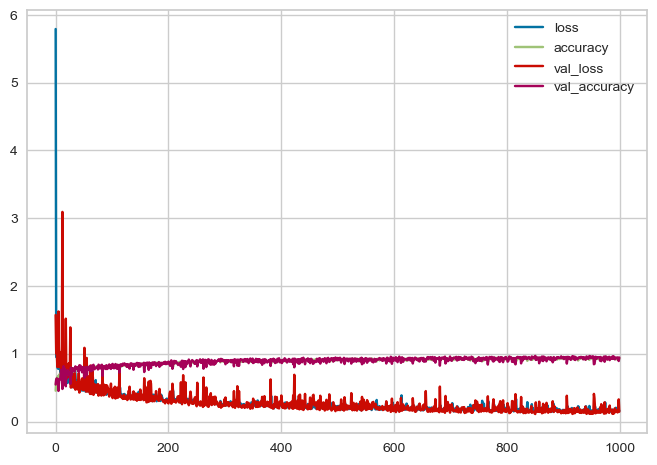

In [39]:
pd.DataFrame(history.history).plot();

In [40]:
y_pred = model.predict(X_test_final)


25/25 [==============================] - 0s 2ms/step


In [41]:
y_pred.shape

(781, 4)

In [42]:
acc=model.evaluate(X_test_final,y_test_cat)


25/25 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9411


In [43]:
print("Accuracy :",(acc[1]*100),"%")

Accuracy : 94.11011338233948 %


In [44]:
# Check for overfitting/underfitting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

if train_loss[-1] > val_loss[-1]:
    print('The model is overfitting')
elif train_loss[-1] < val_loss[-1]:
    print('The model is underfitting')
else:
    print('The model is well-fitted')

The model is overfitting


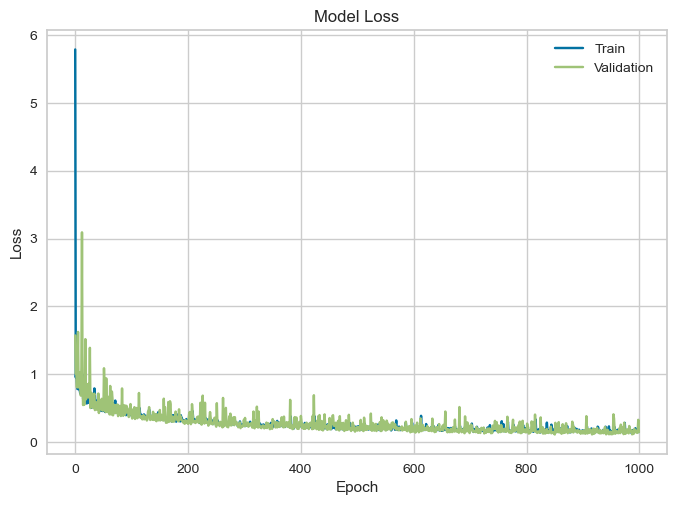

In [45]:
# plot training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

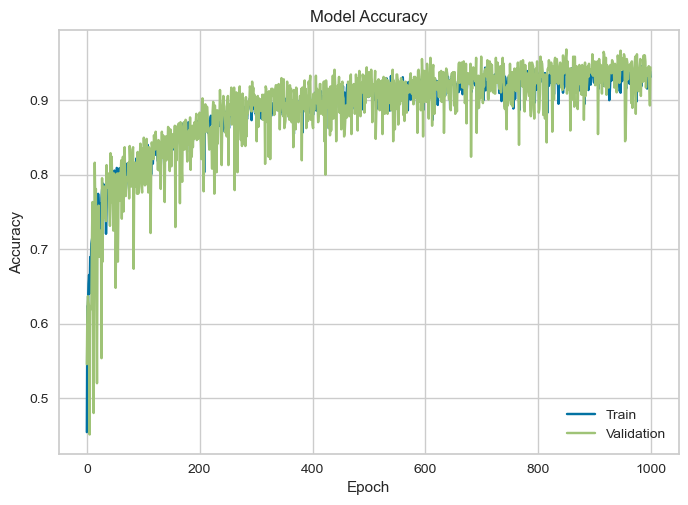

In [46]:
# plot training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

DeepLearning Conclusion:
    The accuracy of the model is 94%.However,it is overfitting. As I really have prospective models in Logistic Regression and SVC, I'll go ahead and perform gridsearch.

# Hyperparameter Tuning

### 12.1.Grid Search for Logistic Regression:

In [291]:
categorical_features

['Segment', 'Score']

In [298]:
from sklearn.pipeline import Pipeline

In [45]:
# define pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', CountEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('logistic', LogisticRegression())])
param_grid = {
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logistic__solver': ['lbfgs', 'liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# cv
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

lr_cv = GridSearchCV(Pipe, param_grid, cv=5)
lr_cv.fit(X_train, y_train)
print(lr_cv.best_params_)
print(lr_cv.best_score_)


{'logistic__C': 1000, 'logistic__penalty': 'l2', 'logistic__solver': 'newton-cg'}
0.9481292307692307


In [54]:
lr_params = {k.replace('logistic__', ''): v for k, v in lr_cv.best_params_.items()}
lr_params

{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       209
           1       0.99      0.94      0.96       215
           2       0.93      0.95      0.94       180
           3       0.95      0.98      0.97       177

    accuracy                           0.95       781
   macro avg       0.95      0.95      0.95       781
weighted avg       0.95      0.95      0.95       781



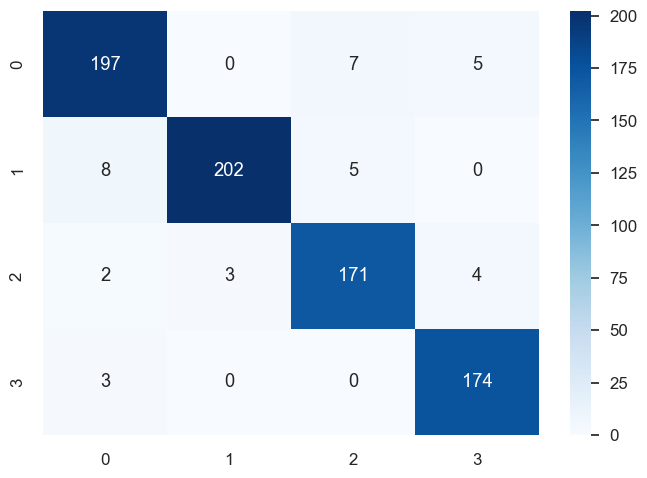

In [323]:
# create model with best params
model = LogisticRegression(C=1000,penalty='l2',solver='newton-cg', random_state=42, n_jobs=-1)

# define pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('logistic', model)])


# fit pipeline
Pipe.fit(X_train, y_train)

# predict on test set
y_pred = Pipe.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues');


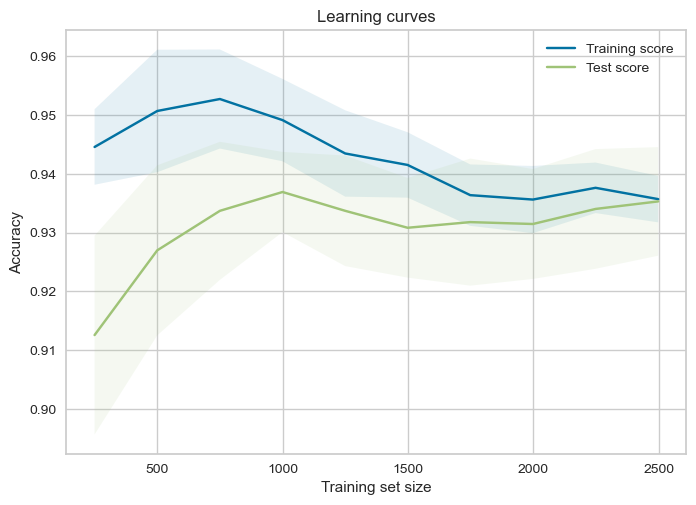

In [77]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=Pipe, 
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=5, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1)

# calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Test score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curves')
plt.show()


#### Conclusion on GridSearch of Logistic Regression:
    The accuracy of the training set increased by 95%.Further,Training score and cross val scores converged as the training set size increased.
    

# Grid Search for SVC:

In [36]:
# define pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', CountEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__loss': ['hinge','squared_hinge'],
    'classifier__dual': [True, False],
    'classifier__tol': [1e-3, 1e-4, 1e-5],
    'classifier__max_iter': [1000, 2000, 5000]
    
}

# cv
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

svm_cv = GridSearchCV(Pipe, param_grid, cv=5,n_jobs=-1)
svm_cv.fit(X_train, y_train)
print(svm_cv.best_params_)
print(svm_cv.best_score_)


{'classifier__dual': False, 'classifier__loss': 'squared_hinge', 'classifier__max_iter': 5000, 'classifier__penalty': 'l1', 'classifier__tol': 1e-05}
0.9125815384615384


In [37]:
svm_params = {k.replace('classifier__', ''): v for k, v in svm_cv.best_params_.items()}
svm_params

{'dual': False,
 'loss': 'squared_hinge',
 'max_iter': 5000,
 'penalty': 'l1',
 'tol': 1e-05}

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       209
           1       0.92      0.90      0.91       215
           2       0.91      0.89      0.90       180
           3       0.91      1.00      0.95       177

    accuracy                           0.91       781
   macro avg       0.91      0.91      0.91       781
weighted avg       0.91      0.91      0.91       781



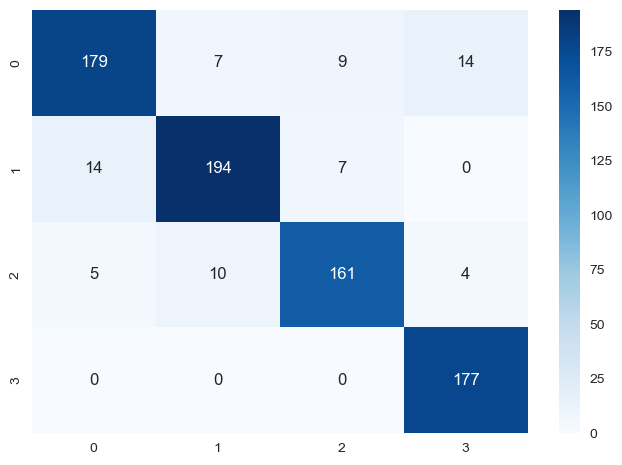

In [38]:
# create model with best params
model = LinearSVC(**svm_params)

# define pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])


# fit pipeline
Pipe.fit(X_train, y_train)

# predict on test set
y_pred = Pipe.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues');

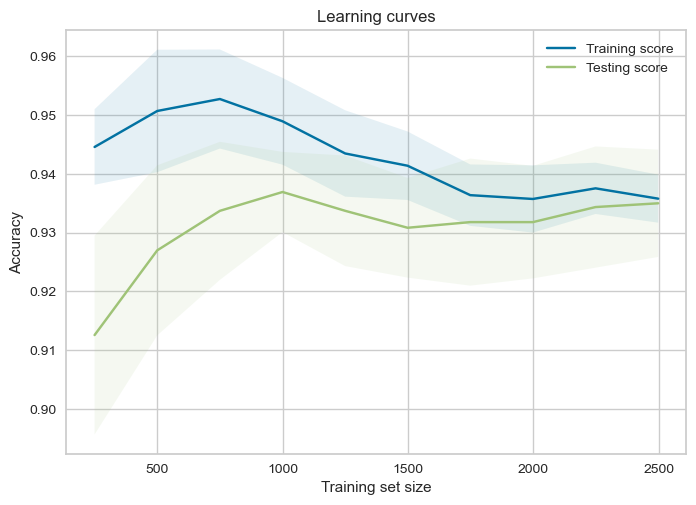

In [78]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=Pipe, 
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=5, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1)

# calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Testing score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curves')
plt.show()


In [ ]:
#### Conclusion on GridSearch of SVC:
    The accuracy of the training set increased to 91%.Further,Training score and cross val scores converged and converged as the training set size increased.

# 13.Model Selection: Ensemble Method: Voting Classifier

- As both the models Logistic Regression and SVC have improved their accuracy in grid search,I want to ensemble them together in a voting classifier.
- Logistic Regression is a probabilistic model that estimates the probability of an instance belonging to a certain class. In contrast, SVM tries to find the best hyperplane that separates the instances of different classes.
- The idea is to combine the best of the abilities as their approaches are different
- As both models approach result differently,I used HARD voting as SOFT voting is not possible


In [47]:
#lr_params={'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
lr_params #best parameters for logistic regression

{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
#svm_params={'dual': False, 'loss': 'squared_hinge', 'max_iter': 5000, 'penalty': 'l1', 'tol': 1e-05}

In [48]:
svm_params #best parameters for svc classifier

{'dual': False,
 'loss': 'squared_hinge',
 'max_iter': 5000,
 'penalty': 'l1',
 'tol': 1e-05}

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       124
           1       0.90      0.96      0.93       112
           2       0.96      0.85      0.91        95
           3       0.90      0.98      0.94       103

    accuracy                           0.92       434
   macro avg       0.92      0.92      0.92       434
weighted avg       0.92      0.92      0.92       434



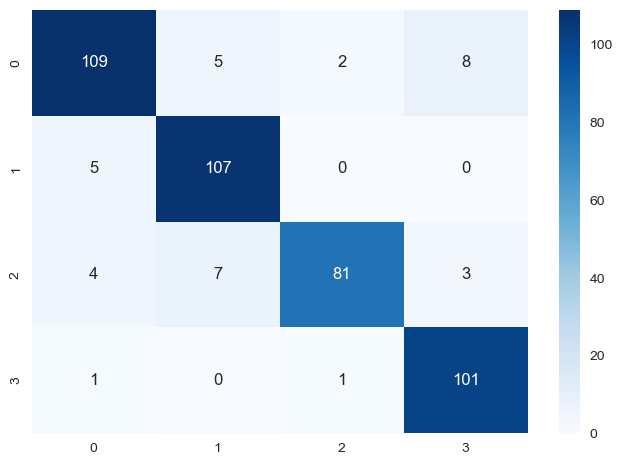

In [52]:
lr = LogisticRegression(**lr_params) #defining models
svc = LinearSVC(**svm_params) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', CountEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]) #defining column trnasformers

Pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('voting', VotingClassifier([('lr', lr), ('svc', svc)],voting='hard'))]) #complete pipe
# fit pipeline
Pipe.fit(X_trainfull, y_trainfull)

# predict on test set
y_pred = Pipe.predict(X_val)

# classification report
print(classification_report(y_val, y_pred))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues');

In [53]:
Pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Recency', 'Frequency',
                                                   'MonetaryValue', 'F']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   CountEncoder(combine_min_nan_groups=True))]),
                                                  ['Segment', 'Score'])])),
                ('voting',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=1000,
                                                                  solver='newton-cg')),
                                              ('svc',
                                               LinearSVC(dual=False,
                                                         max_iter=5000,
                                                         penalty='l1',
                                                         tol=1e-05))]))])

#### To Deploy Pipe Later 

In [82]:
import joblib 
joblib.dump(Pipe, 'my_pipeline.joblib') #for future reference

['my_pipeline.joblib']

# 14.Model Validation

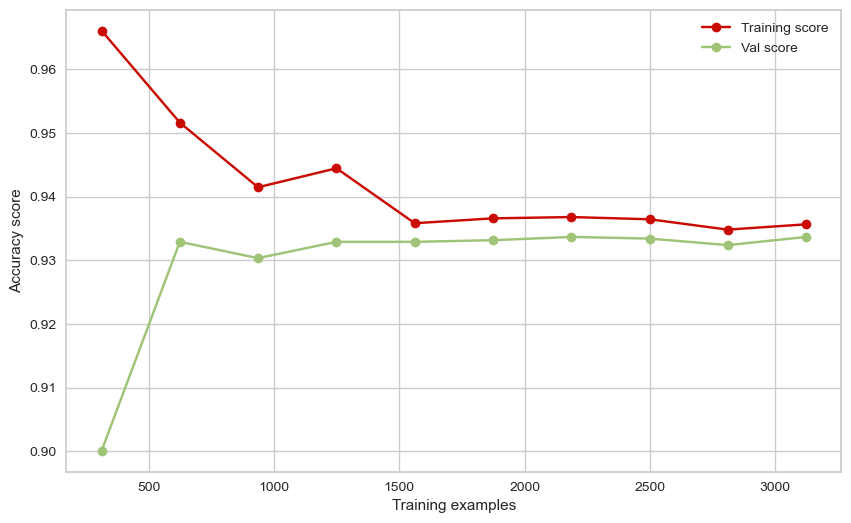

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=Pipe, X=X_trainfull, y=y_trainfull, cv=5,
    train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy')

# plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Val score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()


# Validation:
   - From the plot above,the training and val_scores are converging suggesting good fit.Overall, the teritory metrics such as precision,recall and f1 score have improved compared to the base models.
    

# 15: Feature Importance

In [57]:
lr_coefs=Pipe.named_steps['voting'].estimators_[0].coef_ #coefficients for linear regression
svc_coefs=Pipe.named_steps['voting'].estimators_[1].coef_ #coefficients for svc

In [58]:
X_train.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'F', 'Segment', 'Score'], dtype='object')

In [62]:
print(lr_coefs.shape)
print(svc_coefs.shape)

(4, 6)
(4, 6)


In [63]:
lr_coefs
# it can be seen that there are 6 coeff. for each classification

array([[ 8.36935128e+00,  5.49931416e+00,  3.25321115e+01,
         1.43131873e+00,  3.11586609e-04, -6.39654910e-03],
       [ 1.22815668e+01, -1.58907224e+01, -4.52398174e+01,
        -2.21679459e+00,  2.14066760e-05,  5.75825975e-03],
       [-2.96883216e+00, -4.59683875e+00, -3.15647799e+01,
        -1.42077969e+00,  1.67229310e-03, -6.38191092e-03],
       [-1.76820859e+01,  1.49882470e+01,  4.42724859e+01,
         2.20625555e+00, -2.00528633e-03,  7.02020026e-03]])

In [64]:
svc_coefs

array([[ 1.68719335e-01, -1.34783578e+00,  2.66131325e-02,
         9.25789227e-01, -4.09952583e-04, -6.13023985e-04],
       [ 1.11438528e+00, -6.40913441e+00, -1.35673859e+01,
        -2.84477432e-02,  1.30225698e-03,  1.93456909e-03],
       [-2.70814254e+00, -3.81809995e+00, -9.68163632e+00,
         5.93942079e-02, -2.10480852e-04, -7.40283681e-04],
       [-7.82866264e+00,  2.94930967e+00,  3.59985082e+00,
         3.92496454e-01,  2.89130721e-04,  3.13048838e-03]])

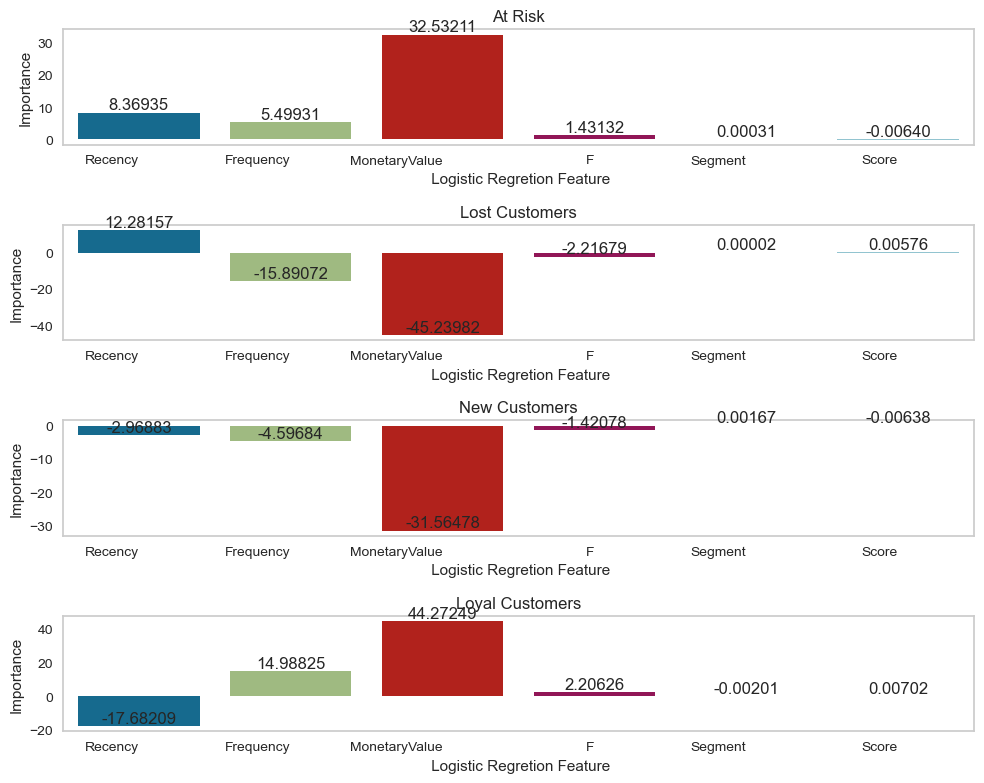

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ['At Risk', 'Lost Customers', 'New Customers', 'Loyal Customers']

# Create a 2x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Create a loop to plot the feature importances for each class label
for i, ax in enumerate(axes.flatten()):
    # Plot the feature importances
    sns.barplot(x=['Recency', 'Frequency', 'MonetaryValue', 'F', 'Segment', 'Score'], y=lr_coefs[i], ax=ax)
    ax.set_title(class_labels[i])
    ax.set_xlabel(' Logistic Regretion Feature')
    ax.set_ylabel('Importance')
    ax.grid(False)
    
    # Add text to show the coefficient values
    for j, coef in enumerate(lr_coefs[i]):
        ax.text(j, coef + 0.05, f'{coef:.5f}', ha='center',va='bottom')
    # Adjust the rotation angle of the x-axis labels
    plt.setp(ax.get_xticklabels() ,ha='right')

   # Adjust the layout of the plots
plt.tight_layout()

# Display the plots
plt.show()


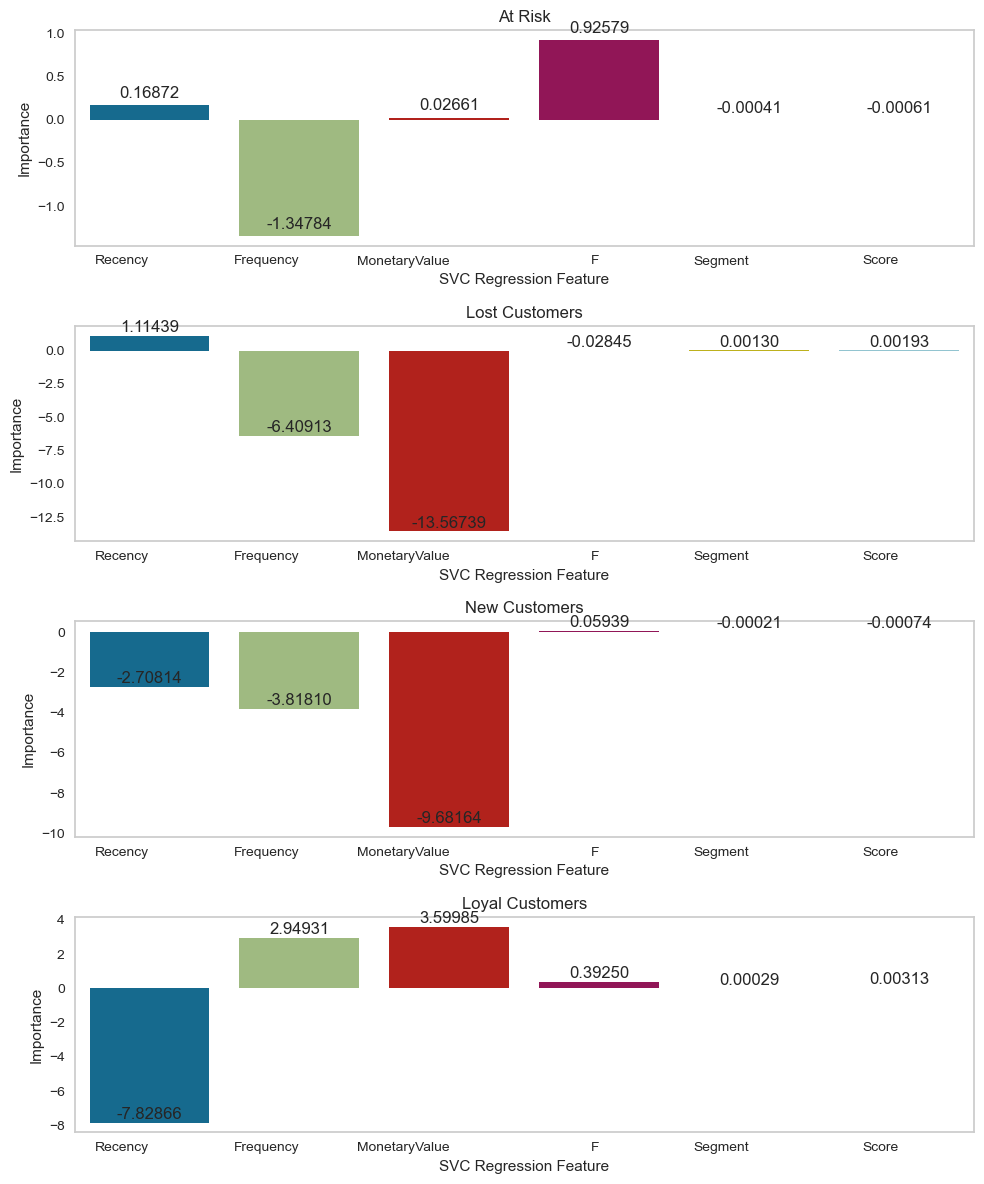

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ['At Risk', 'Lost Customers', 'New Customers', 'Loyal Customers']

# Create a 2x2 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Create a loop to plot the feature importances for each class label
for i, ax in enumerate(axes.flatten()):
    # Plot the feature importances
    sns.barplot(x=['Recency', 'Frequency', 'MonetaryValue', 'F', 'Segment', 'Score'], y=svc_coefs[i], ax=ax)
    ax.set_title( class_labels[i])
    ax.set_xlabel('SVC Regression Feature')
    ax.set_ylabel('Importance')
    ax.grid(False)  # Remove gridlines
    
    # Add text to show the coefficient values
    for j, coef in enumerate(svc_coefs[i]):
        ax.text(j, coef + 0.05, f'{coef:.5f}', ha='center',va='bottom')
        
    # Adjust the rotation angle of the x-axis labels
    plt.setp(ax.get_xticklabels(), ha='right')

   # Adjust the layout of the plots
plt.tight_layout()

# Display the plots
plt.show()

#  Part 15 :Feature Importance
- As we are doing a classification model,It is extremly difficuly to interpret how each feature is infuencing the model.
- I have made an effor to draw plot the corresponding coefficients and ploted individually.I cannot perform mean as I am doing a voting classifier with HARD voting.
- Please note that I cannot use soft voting as the models are fundamentally different from each other.
- While their findamental equations are quite similar to compare the coefficients, it can be observed from the graphs that the coefficient values and their respective importance in both Logistic Regression and Linear Regression are quite different.
  


# Part 16 : Conclusions

The work described in this notebook is based on a database providing details on purchases made on an E-commerce platform over a period of one year. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date.
From the data, I have built an RFM(Recency,Frequency,Monetaryvalue) clusters using K-Means Clustering.I used that data as a multiclass classfication data and trained an ML model.
 Steps:
 - Baseline Models such as Logistic Regression,Random Forest,K Nearest Neighbour,SVC,XGBoost
 - Based on accuracy and fit,I choose Logistic Regression and SVC for hypertuning
 - Conducted final validation test and found better precision,recall,f1 score along with accuracy.

###  RFM Clustering:
| Cluster |Type of customers | % | RFM Label | RFM Interpretation | Actioinable insight |
| ------- | ---------------- | - | --------- |--------------------|---------------------|
| 0       |  At risk customers  | 28.1% |36% At risk 	 |Customer who made their last transaction a while ago and who made frequent and large purchases in the past.|The online store should offer the customer popular products at a discount or reconnect the customer|
| 1       |  Lost customers/churned customers  | 25.43% |85.6%  Hibernating	 |Customers who made their last transaction a long time ago, and who have made few purchases. Therefore, it could be the cluster of Lost customer/churned customers. Additionally, RFM segmentation shows that most customers are Hibernating in this cluster|A marketing campaign should be launched to revive interest in online stores|
| 2       |  New customers  | 22.36% |38.5% Potential loyalists 	 |Customer who made their last transaction a while ago and who made frequent and large purchases in the past.|The online store should offer the customer popular products at a discount or reconnect the customer|
| 3       |  Loyal customers  | 24.11% |55.4% Champions 	 |Most frequent customers with the highest monetary spending amount and transact most recently|The online store should upsell higher value products and solicit reviews from this group of customers to provide better service and products|



 - Conducting deeper segmentation on customers based on their geographical location, and demographic and psychographic factors.
- Regarding this dataset,I didnt consider geography as most customers are from UK.So,I wont help the model.

## ML Insights
- I found that 92% of the customers were awarded the right clusters.

- The performance of the classifier therefore seems correct given the potential shortcomings of the current model. In particular, a bias that has not been dealt with concerns the seasonality of purchases and the fact that purchasing habits will potentially depend on the time of year (for example, Christmas)

- The customer data is also too limited which summed upto 4000approx.

- To avoid seasonality bias and better clustering, larger data sets are required.

#### Deployment
- In real-time, you can use a web framework like Flask or Django to create an API that can receive incoming requests, preprocess the input data using the pipeline, and return the predictions back to the client.

- Use Cases: Food Chains to cluster customers for custom discounts,Custom Email flows,Discount pop up's in apps from retail stores 
